In [1]:
## Imports

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import math
from scipy.special import factorial

## Data Import

In [2]:
## Import Cs-137 and background dataset

run_cs = '00176'  # 00176 - 00179
run_bk = '00175'  # 00175, 00180
filenameprefix = 'run_cs_'+run_cs+'_bkg_'+run_bk
filenameprefix_cs = 'run_'+run_cs
filenameprefix_bk = 'run_'+run_bk

ctx = straxbra.XebraContext()

p_cs = ctx.get_array(run_cs, 'peaks')
p_bk = ctx.get_array(run_bk, 'peaks')

print(p_cs['area'].shape[0])
print(p_bk['area'].shape[0])
print((p_cs['area'].shape[0])/(p_bk['area'].shape[0]))

1077176
232967
4.623727824112428


In [3]:
ctx.data_info('peaks')

,Field name,Data type,Comment
0,channel,int16,Channel/PMT number
1,dt,int16,Time resolution in ns
2,time,int64,Start time of the interval (ns since unix epoch)
3,length,int32,Length of the interval in samples
4,area,float32,Integral across channels in photoelectrons
5,area_per_channel,"('<f4', (8,))",Integral per channel in PE
6,n_hits,int32,Number of hits from which peak was constructed...
7,data,"('<f4', (200,))",Waveform data in PE/sample (not PE/ns!)
8,width,"('<f4', (11,))",Peak widths in ns: range of central area fraction
9,area_decile_from_midpoint,"('<f4', (11,))",Peak widths in ns: area from midpoint


In [4]:
print(p_cs['area'].shape)
print(p_cs['area_per_channel'].shape)
print(p_bk['area'].shape)
print(p_bk['area_per_channel'].shape)

(1077176,)
(1077176, 8)
(232967,)
(232967, 8)


In [5]:
# only top PMTs to reduce saturation

p_cs_area_top = p_cs['area']-p_cs['area_per_channel'][:,0] # np.array([np.sum(i) for i in p_cs['area_per_channel'][:,1:]])
p_bk_area_top = p_bk['area']-p_bk['area_per_channel'][:,0]

print(p_cs_area_top.shape)
print(p_bk_area_top.shape)

(1077176,)
(232967,)


## Hist 2D

### Area top vs width

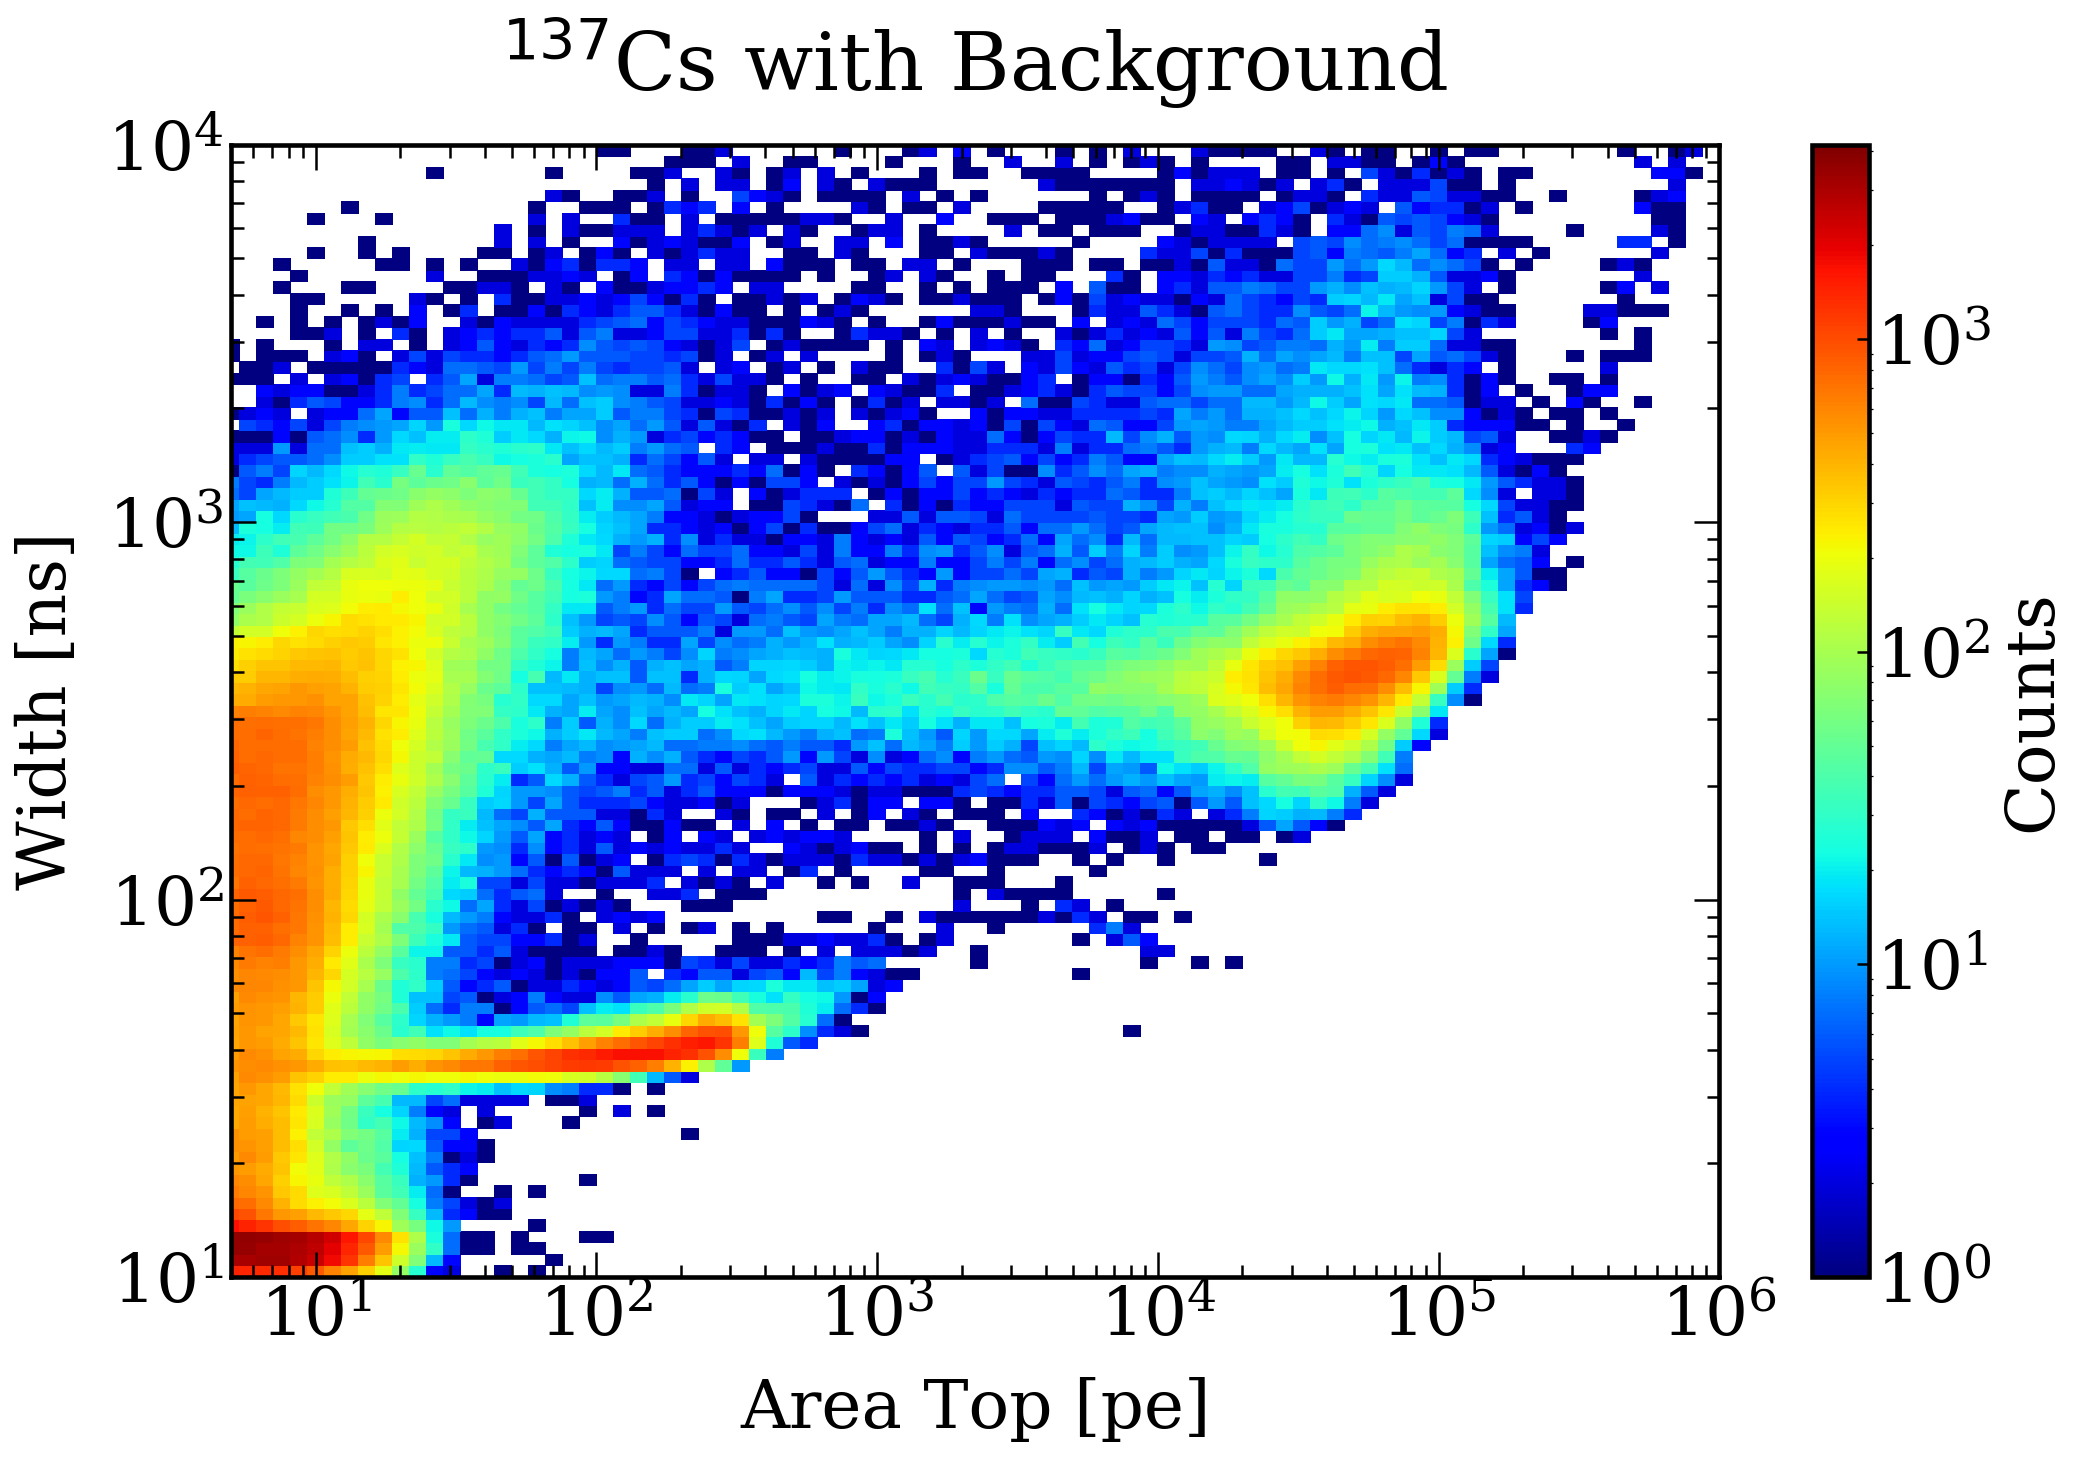

In [6]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins_x = np.logspace(0, 6, 100)
bins_y = np.logspace(1, 4, 100)

counts_cs, _, _ = np.histogram2d(p_cs_area_top, p_cs['width'][:,5], bins=(bins_x, bins_y))
im = plt.pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), cmap = 'jet')

plt.yscale('log')
plt.xscale('log')
plt.xlim(left=5)

plt.xlabel('Area Top [pe]', fontsize = label_size, labelpad = label_pad) # -35*mm,35*mm = 70
plt.ylabel('Width [ns]', fontsize = label_size, labelpad = label_pad) # 68.5*mm - 2*0.15*mm
plt.title('$^{137}$Cs with Background', fontsize = title_size, pad = title_pad)

plt.gca().set_aspect('auto', adjustable='box')

# Colorbar
cbar = plt.colorbar()
cbar.outline.set_linewidth(2.2)
cbar.ax.tick_params(direction='in', labelsize=label_size, width=1.2, length=6)
cbar.set_label(label='Counts', fontsize=label_size)

fig.savefig(filenameprefix_cs+"_areaTop_width_unscaled.png", bbox_inches='tight')
plt.show()

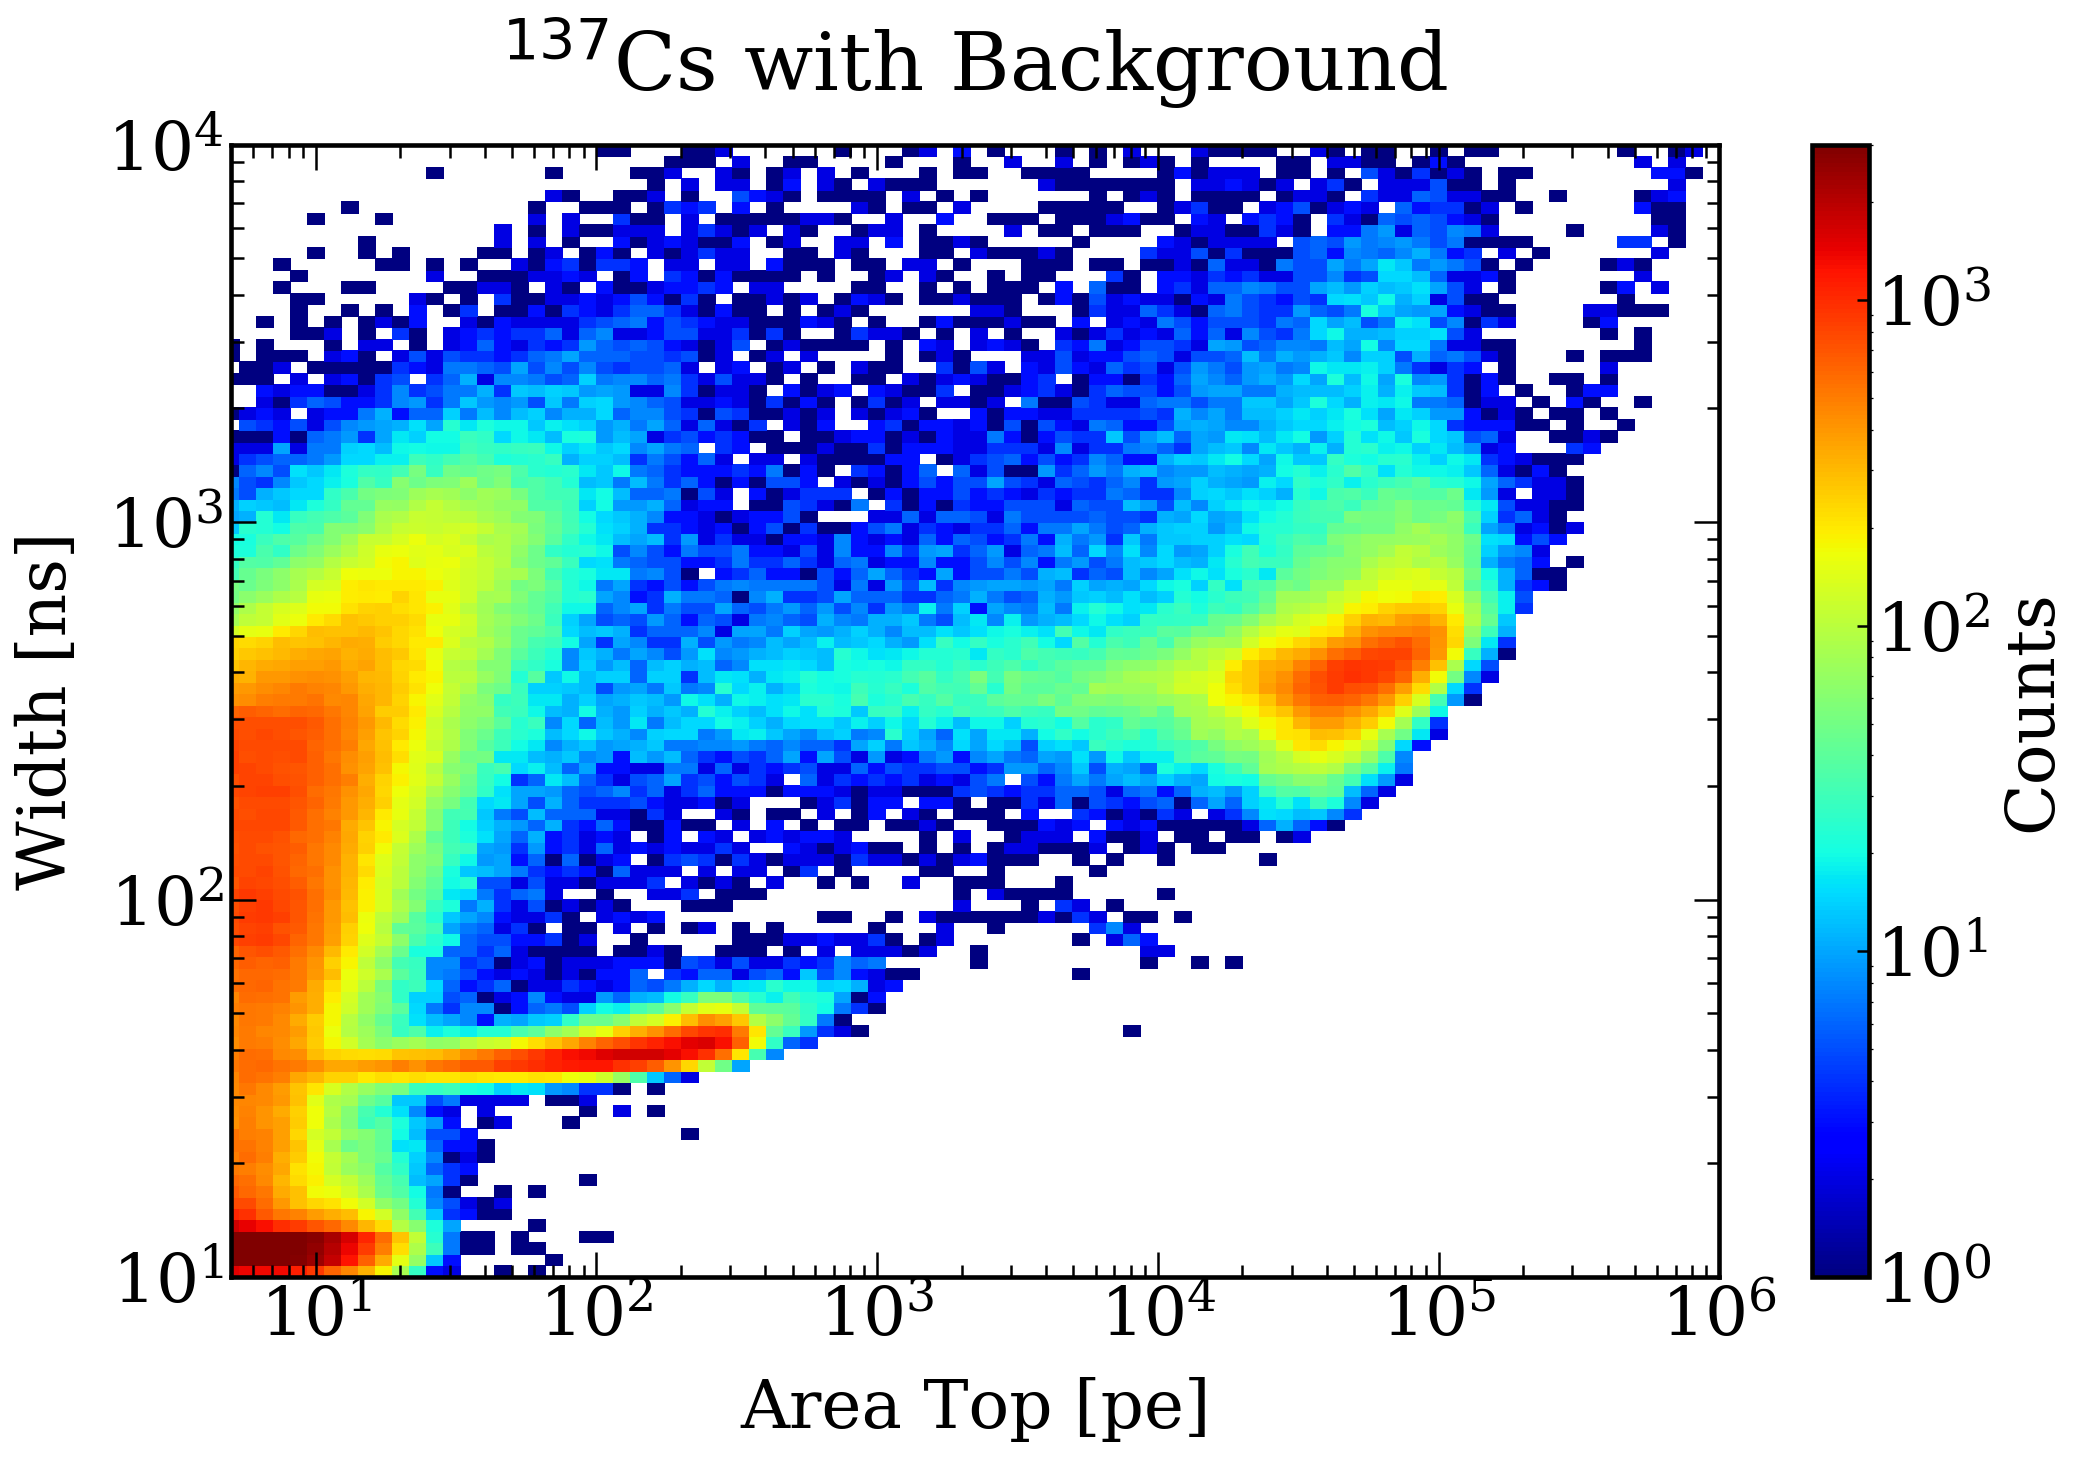

In [7]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins_x = np.logspace(0, 6, 100)
bins_y = np.logspace(1, 4, 100)

counts_cs, _, _ = np.histogram2d(p_cs_area_top, p_cs['width'][:,5], bins=(bins_x, bins_y))
im = plt.pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), cmap = 'jet', vmax=3e3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(left=5)

plt.xlabel('Area Top [pe]', fontsize = label_size, labelpad = label_pad) # -35*mm,35*mm = 70
plt.ylabel('Width [ns]', fontsize = label_size, labelpad = label_pad) # 68.5*mm - 2*0.15*mm
plt.title('$^{137}$Cs with Background', fontsize = title_size, pad = title_pad)

plt.gca().set_aspect('auto', adjustable='box')

# Colorbar
cbar = plt.colorbar()
cbar.outline.set_linewidth(2.2)
cbar.ax.tick_params(direction='in', labelsize=label_size, width=1.2, length=6)
cbar.set_label(label='Counts', fontsize=label_size)

fig.savefig(filenameprefix_cs+"_areaTop_width.png", bbox_inches='tight')
plt.show()

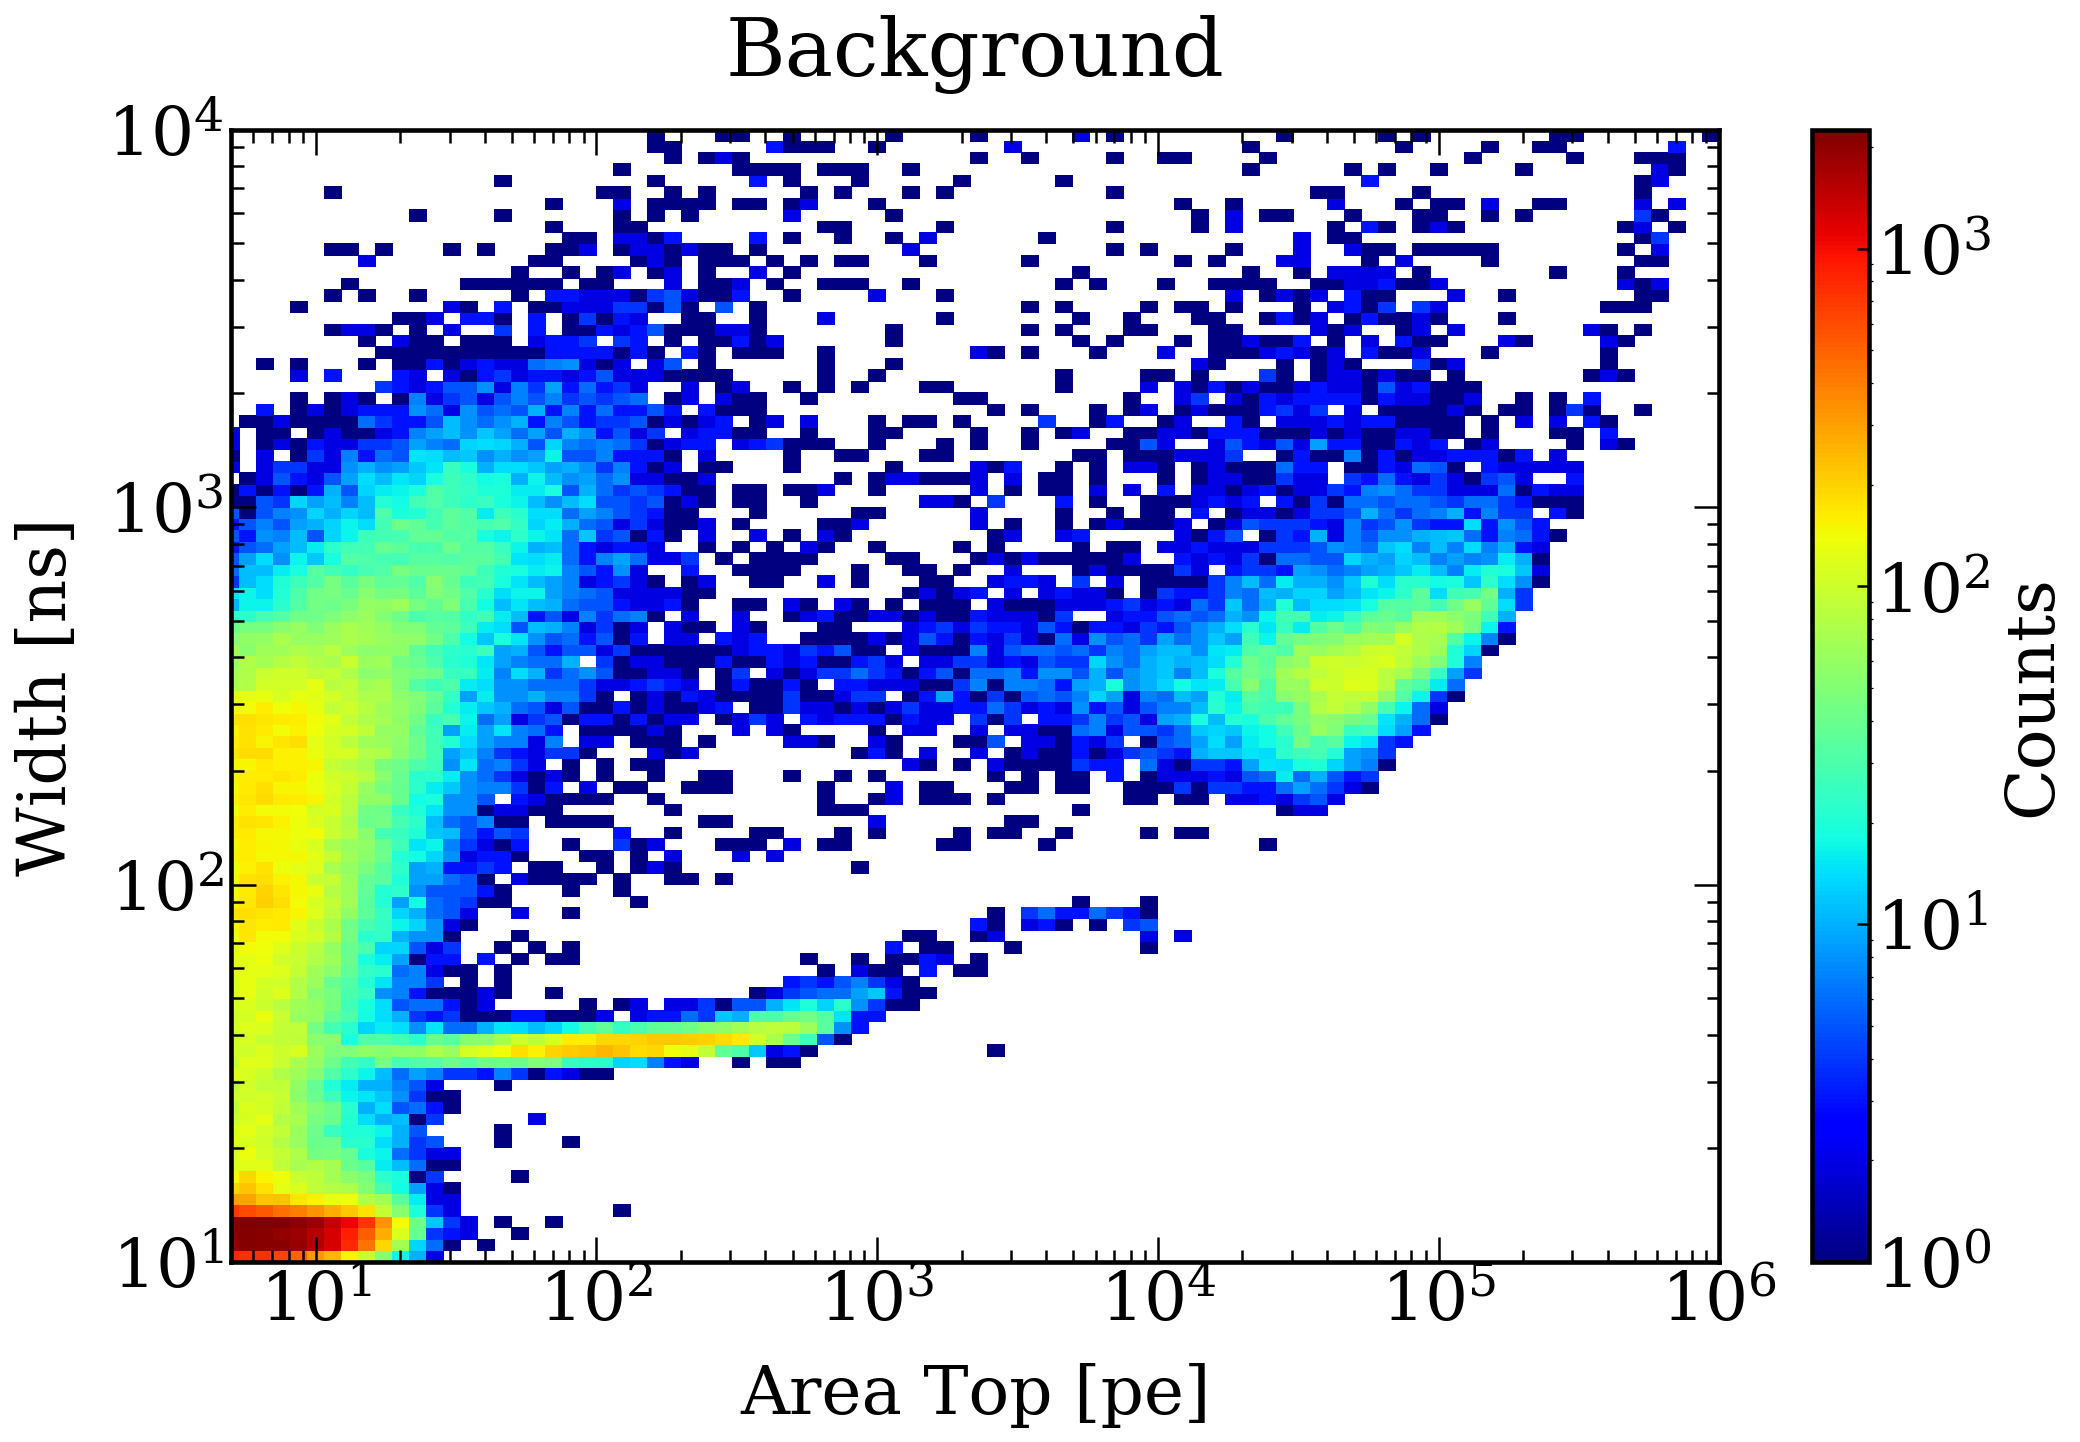

In [8]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins_x = np.logspace(0, 6, 100)
bins_y = np.logspace(1, 4, 100)

counts_bk, _, _ = np.histogram2d(p_bk_area_top, p_bk['width'][:,5], bins=(bins_x, bins_y))
im = plt.pcolormesh(bins_x, bins_y, counts_bk.T, norm=mpl.colors.LogNorm(), cmap = 'jet')

plt.yscale('log')
plt.xscale('log')
plt.xlim(left=5)

plt.xlabel('Area Top [pe]', fontsize = label_size, labelpad = label_pad) # -35*mm,35*mm = 70
plt.ylabel('Width [ns]', fontsize = label_size, labelpad = label_pad) # 68.5*mm - 2*0.15*mm
plt.title('Background', fontsize = title_size, pad = title_pad)

plt.gca().set_aspect('auto', adjustable='box')

# Colorbar
cbar = plt.colorbar()
cbar.outline.set_linewidth(2.2)
cbar.ax.tick_params(direction='in', labelsize=label_size, width=1.2, length=6)
cbar.set_label(label='Counts', fontsize=label_size)

fig.savefig(filenameprefix_bk+"_areaTop_width_unscaled.png", bbox_inches='tight')
plt.show()

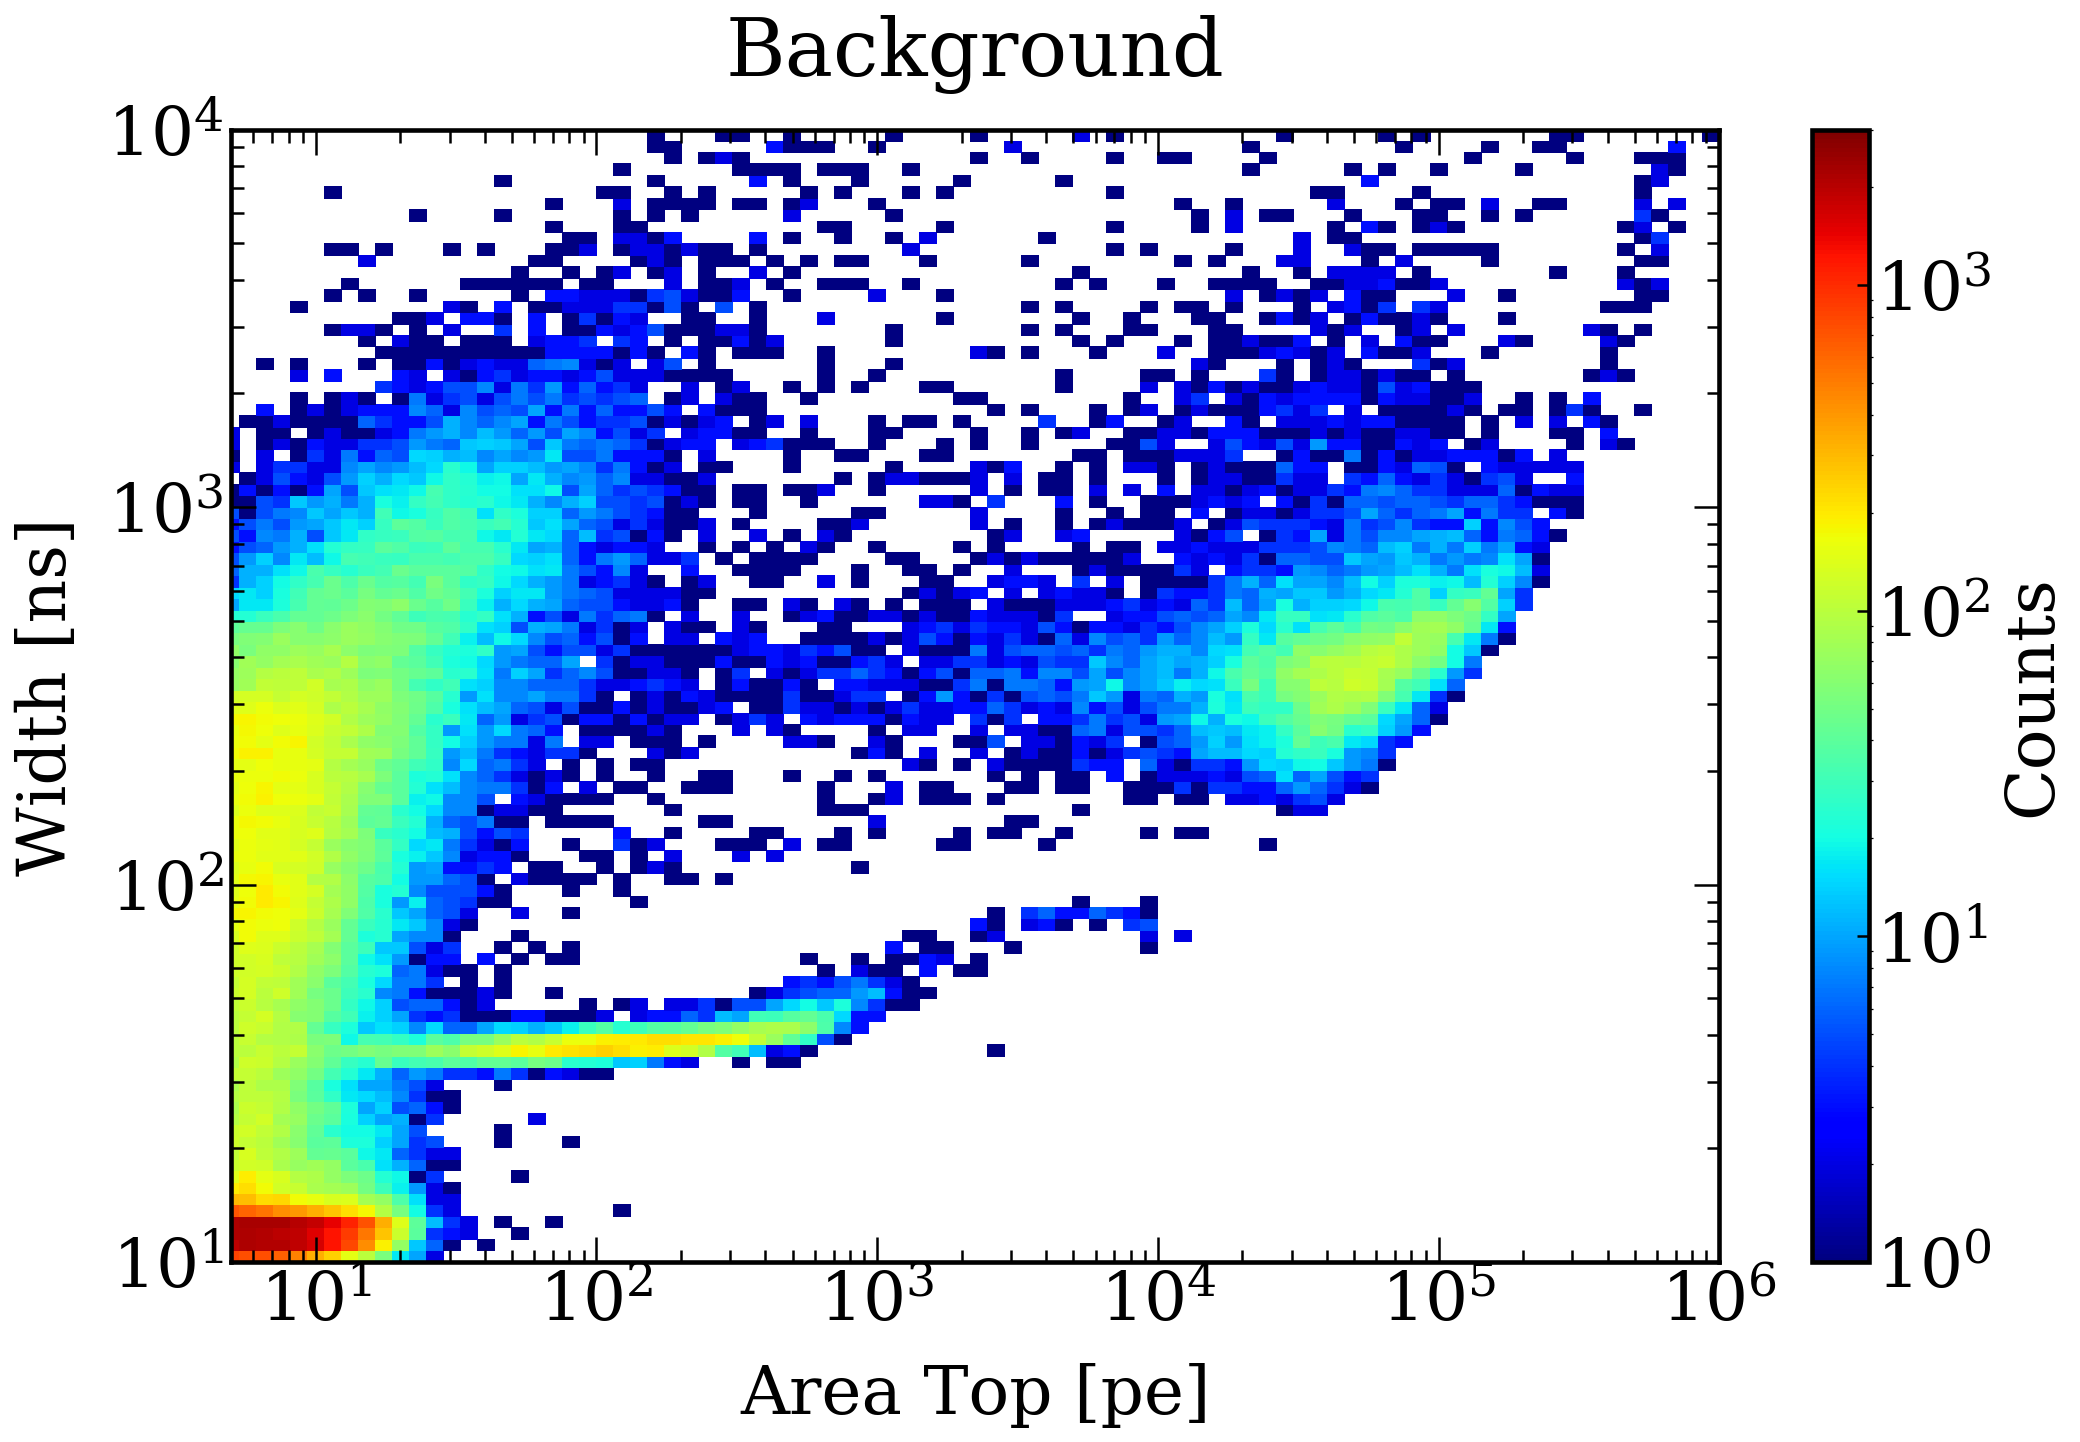

In [9]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins_x = np.logspace(0, 6, 100)
bins_y = np.logspace(1, 4, 100)

counts_bk, _, _ = np.histogram2d(p_bk_area_top, p_bk['width'][:,5], bins=(bins_x, bins_y))
im = plt.pcolormesh(bins_x, bins_y, counts_bk.T, norm=mpl.colors.LogNorm(), cmap = 'jet', vmax=3e3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(left=5)

plt.xlabel('Area Top [pe]', fontsize = label_size, labelpad = label_pad) # -35*mm,35*mm = 70
plt.ylabel('Width [ns]', fontsize = label_size, labelpad = label_pad) # 68.5*mm - 2*0.15*mm
plt.title('Background', fontsize = title_size, pad = title_pad)

plt.gca().set_aspect('auto', adjustable='box')

# Colorbar
cbar = plt.colorbar()
cbar.outline.set_linewidth(2.2)
cbar.ax.tick_params(direction='in', labelsize=label_size, width=1.2, length=6)
cbar.set_label(label='Counts', fontsize=label_size)

fig.savefig(filenameprefix_bk+"_areaTop_width.png", bbox_inches='tight')
plt.show()

## Area histogram

In [10]:
p_cs_area_top_s1 = p_cs_area_top[(p_cs['width'][:,5] > 20) & (p_cs['width'][:,5] < 100) & (20 < p_cs_area_top) & (p_cs_area_top < 2e3)]
p_bk_area_top_s1 = p_bk_area_top[(p_bk['width'][:,5] > 20) & (p_bk['width'][:,5] < 100) & (20 < p_bk_area_top) & (p_bk_area_top < 2e3)]
print(p_cs_area_top.shape[0])
print(p_cs_area_top_s1.shape[0])
print((p_cs_area_top_s1.shape[0])/(p_cs_area_top.shape[0]))
p_cs_width_s1 = p_cs['width'][:,5][(p_cs['width'][:,5] > 20) & (p_cs['width'][:,5] < 100) & (20 < p_cs_area_top) & (p_cs_area_top < 2e3)]
p_bk_width_s1 = p_bk['width'][:,5][(p_bk['width'][:,5] > 20) & (p_bk['width'][:,5] < 100) & (20 < p_bk_area_top) & (p_bk_area_top < 2e3)]

1077176
58768
0.05455747250217235


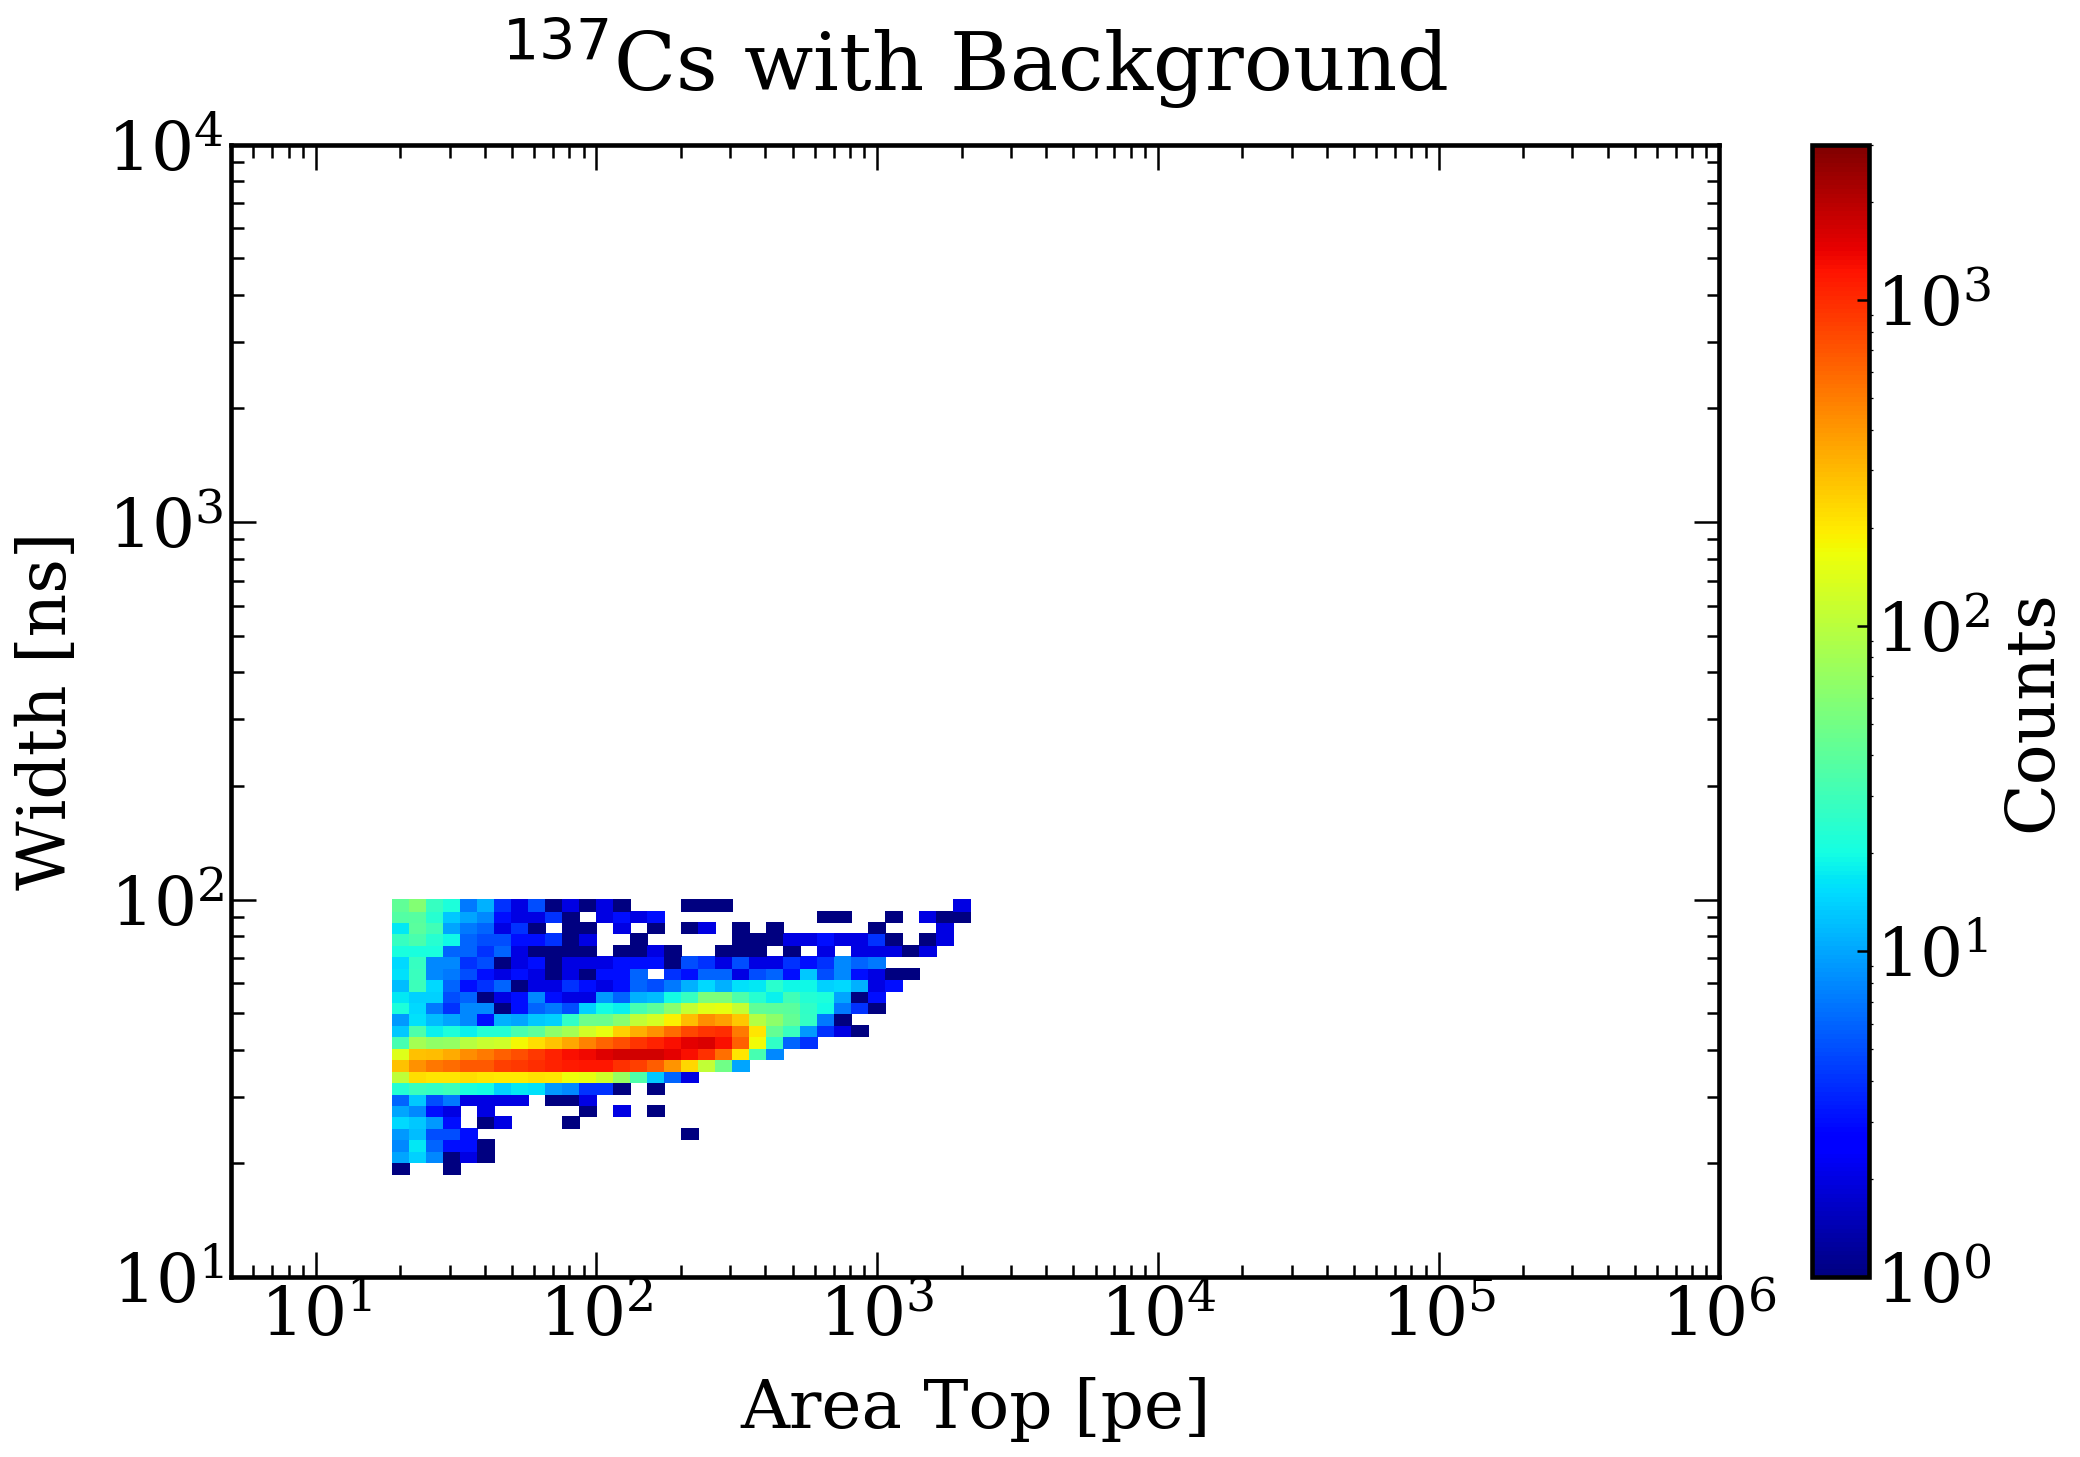

In [11]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins_x = np.logspace(0, 6, 100)
bins_y = np.logspace(1, 4, 100)

counts_cs, _, _ = np.histogram2d(p_cs_area_top_s1, p_cs_width_s1, bins=(bins_x, bins_y))
im = plt.pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), cmap = 'jet', vmax=3e3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(left=5)

plt.xlabel('Area Top [pe]', fontsize = label_size, labelpad = label_pad) # -35*mm,35*mm = 70
plt.ylabel('Width [ns]', fontsize = label_size, labelpad = label_pad) # 68.5*mm - 2*0.15*mm
plt.title('$^{137}$Cs with Background', fontsize = title_size, pad = title_pad)

plt.gca().set_aspect('auto', adjustable='box')

plt.xlim(5, 1e6)
plt.ylim(1e1, 1e4)

# Colorbar
cbar = plt.colorbar()
cbar.outline.set_linewidth(2.2)
cbar.ax.tick_params(direction='in', labelsize=label_size, width=1.2, length=6)
cbar.set_label(label='Counts', fontsize=label_size)

fig.savefig(filenameprefix_cs+"_areaTop_width_cutout.png", bbox_inches='tight')
plt.show()

## Area histogram

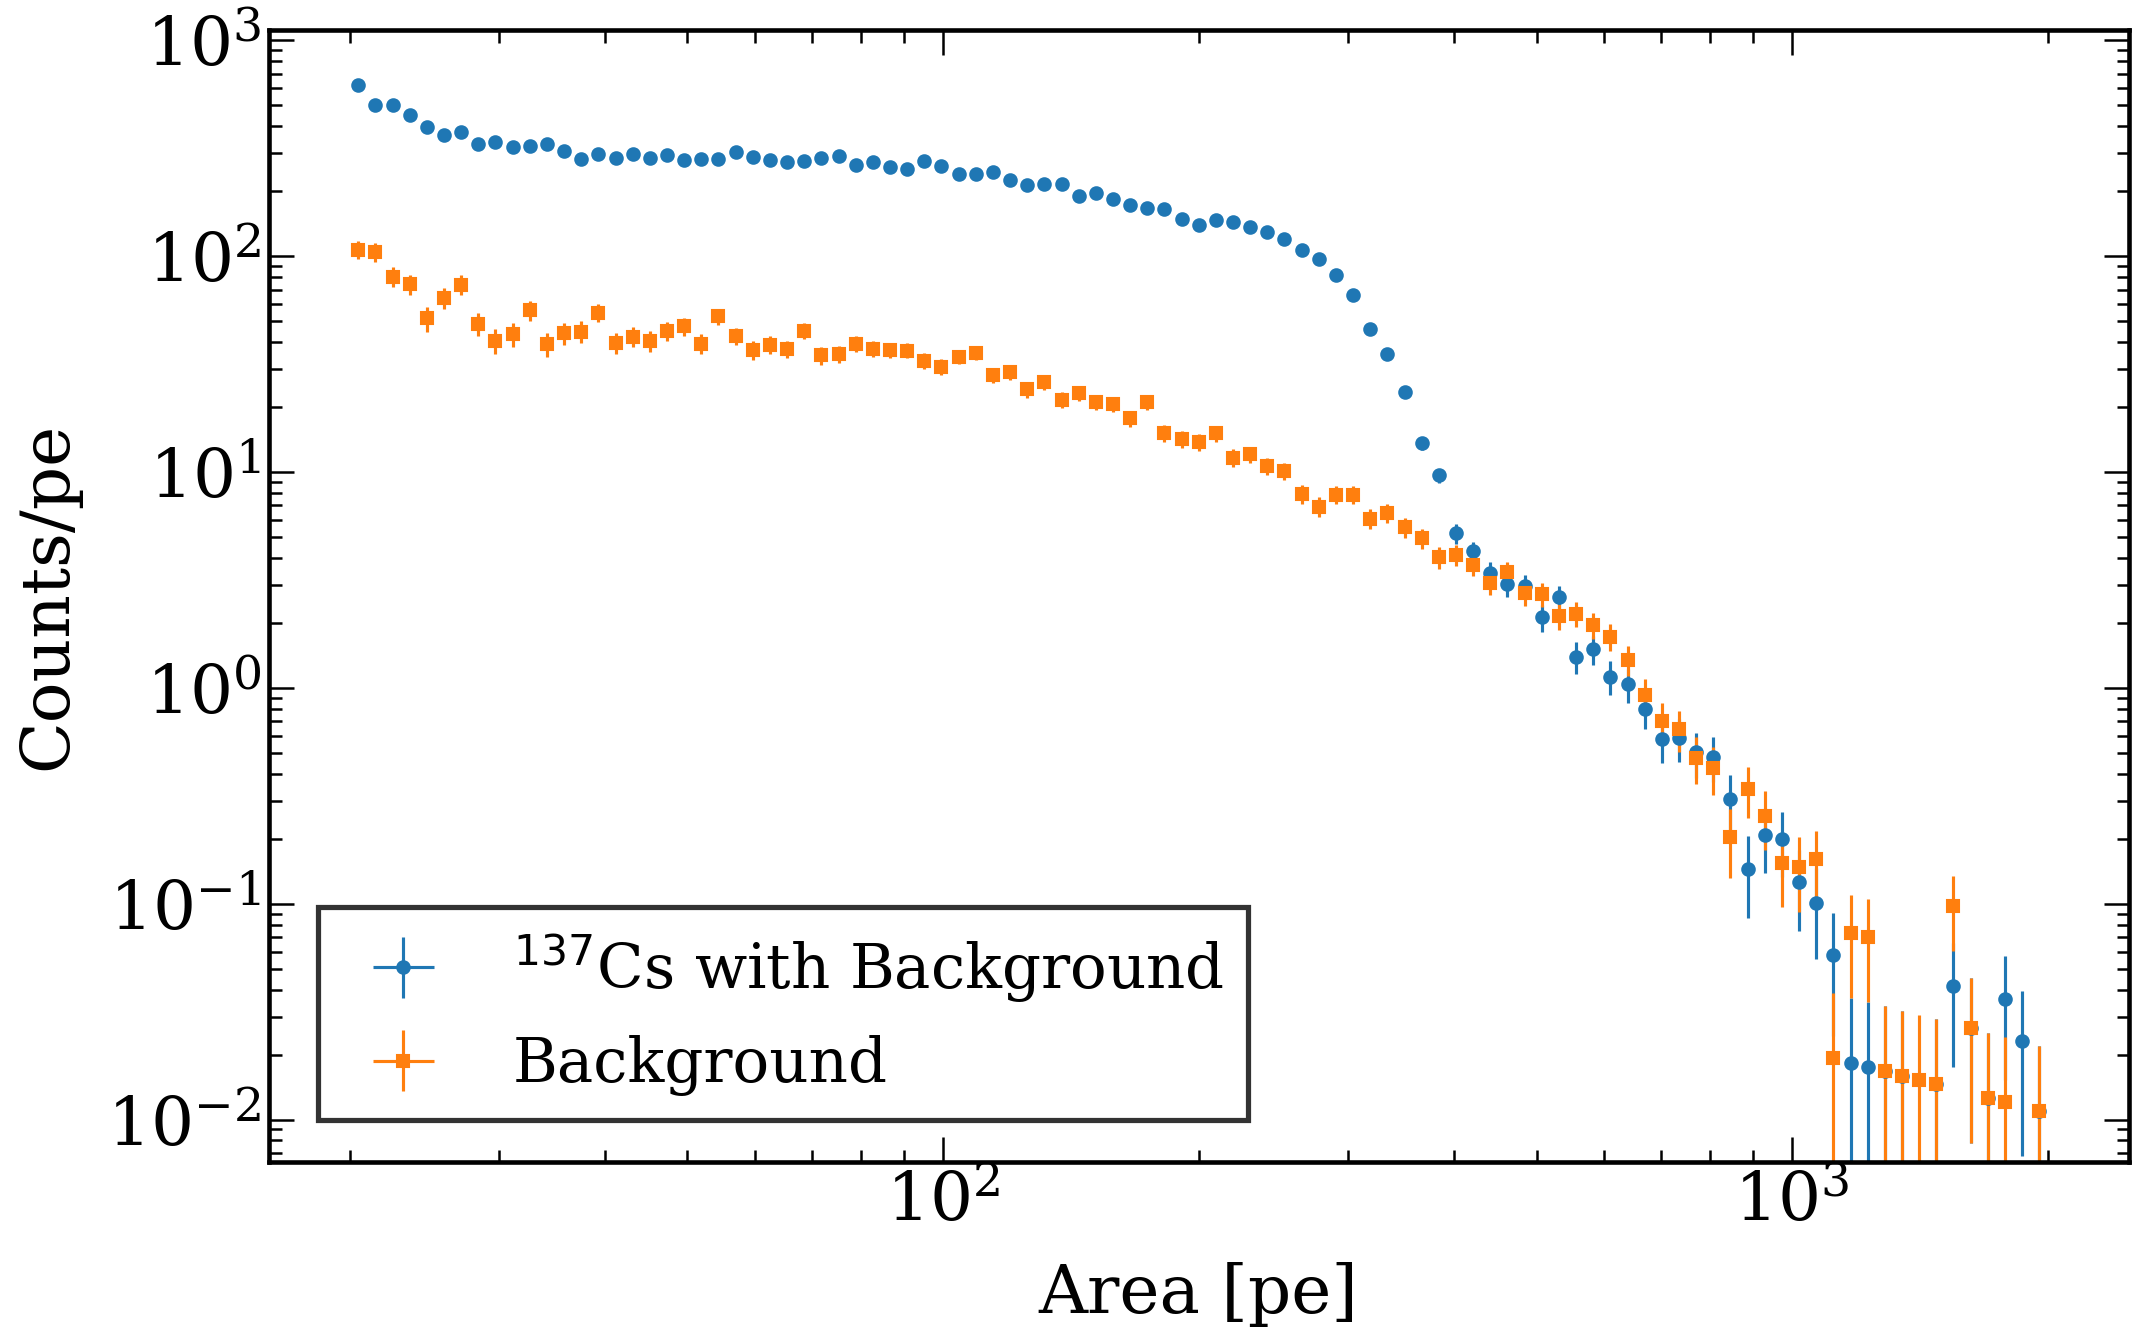

In [12]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins = 2*np.logspace(1,3,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])

n_cs, _ = np.histogram(p_cs_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_cs/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_cs)/bin_fullwidths, capsize=0, linestyle='', label='$^{137}$Cs with Background', fmt='o')

n_bk, _ = np.histogram(p_bk_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_bk/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_bk)/bin_fullwidths, capsize=0, linestyle='', label='Background', fmt='s')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=3, bbox_to_anchor=(0.01,0.01), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_log_log.png", bbox_inches='tight')
plt.show()

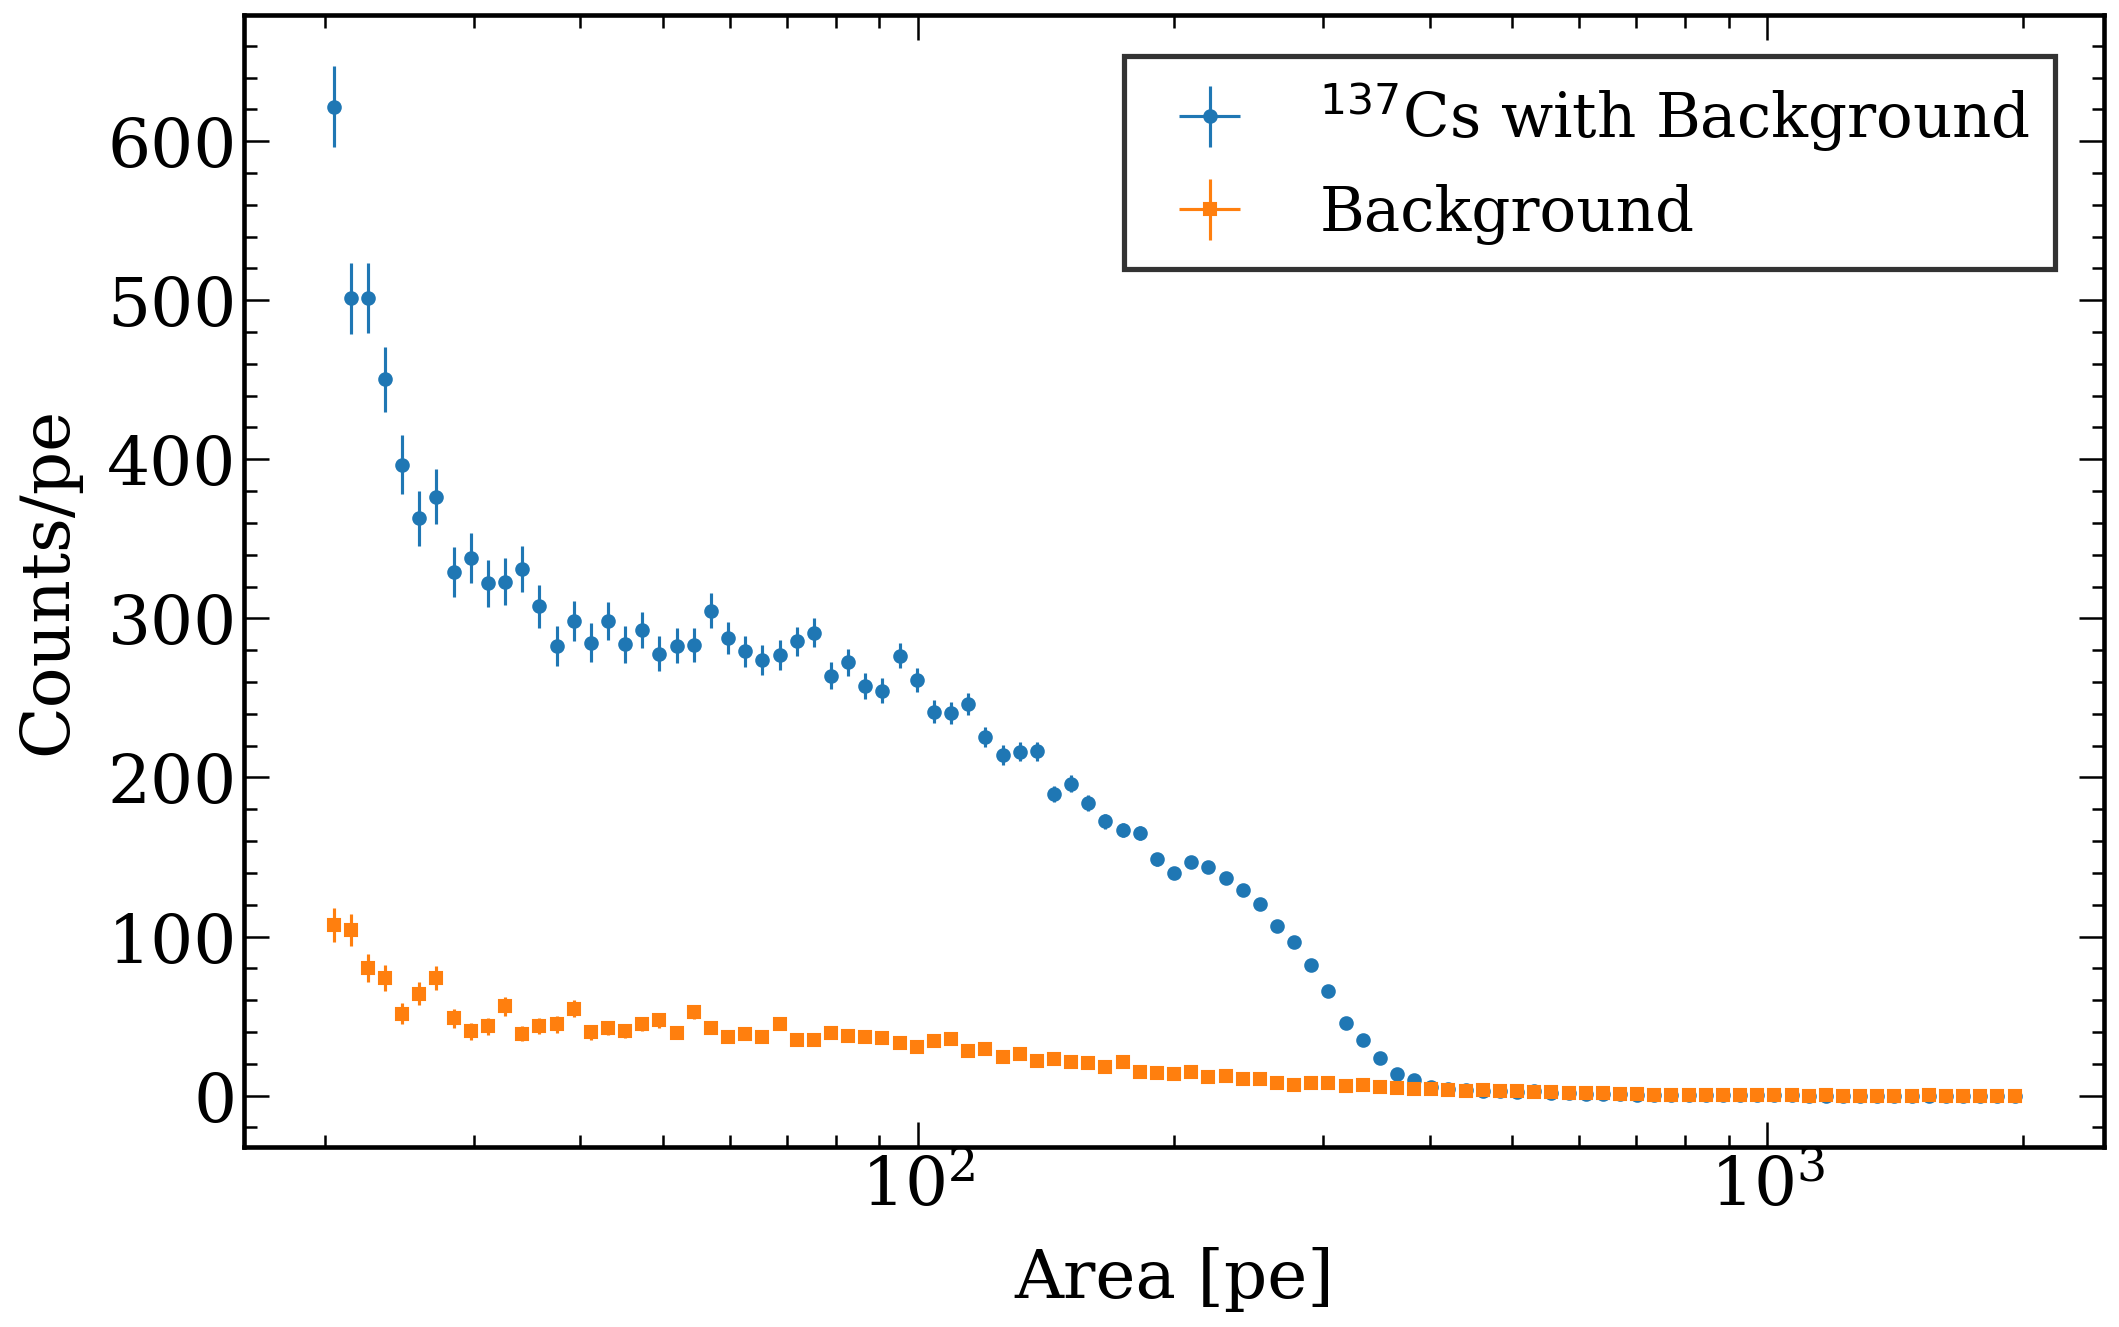

In [13]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins = 2*np.logspace(1,3,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])

n_cs, _ = np.histogram(p_cs_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_cs/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_cs)/bin_fullwidths, capsize=0, linestyle='', label='$^{137}$Cs with Background', fmt='o')

n_bk, _ = np.histogram(p_bk_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_bk/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_bk)/bin_fullwidths, capsize=0, linestyle='', label='Background', fmt='s')

#plt.yscale('log')
plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_log_lin.png", bbox_inches='tight')
plt.show()

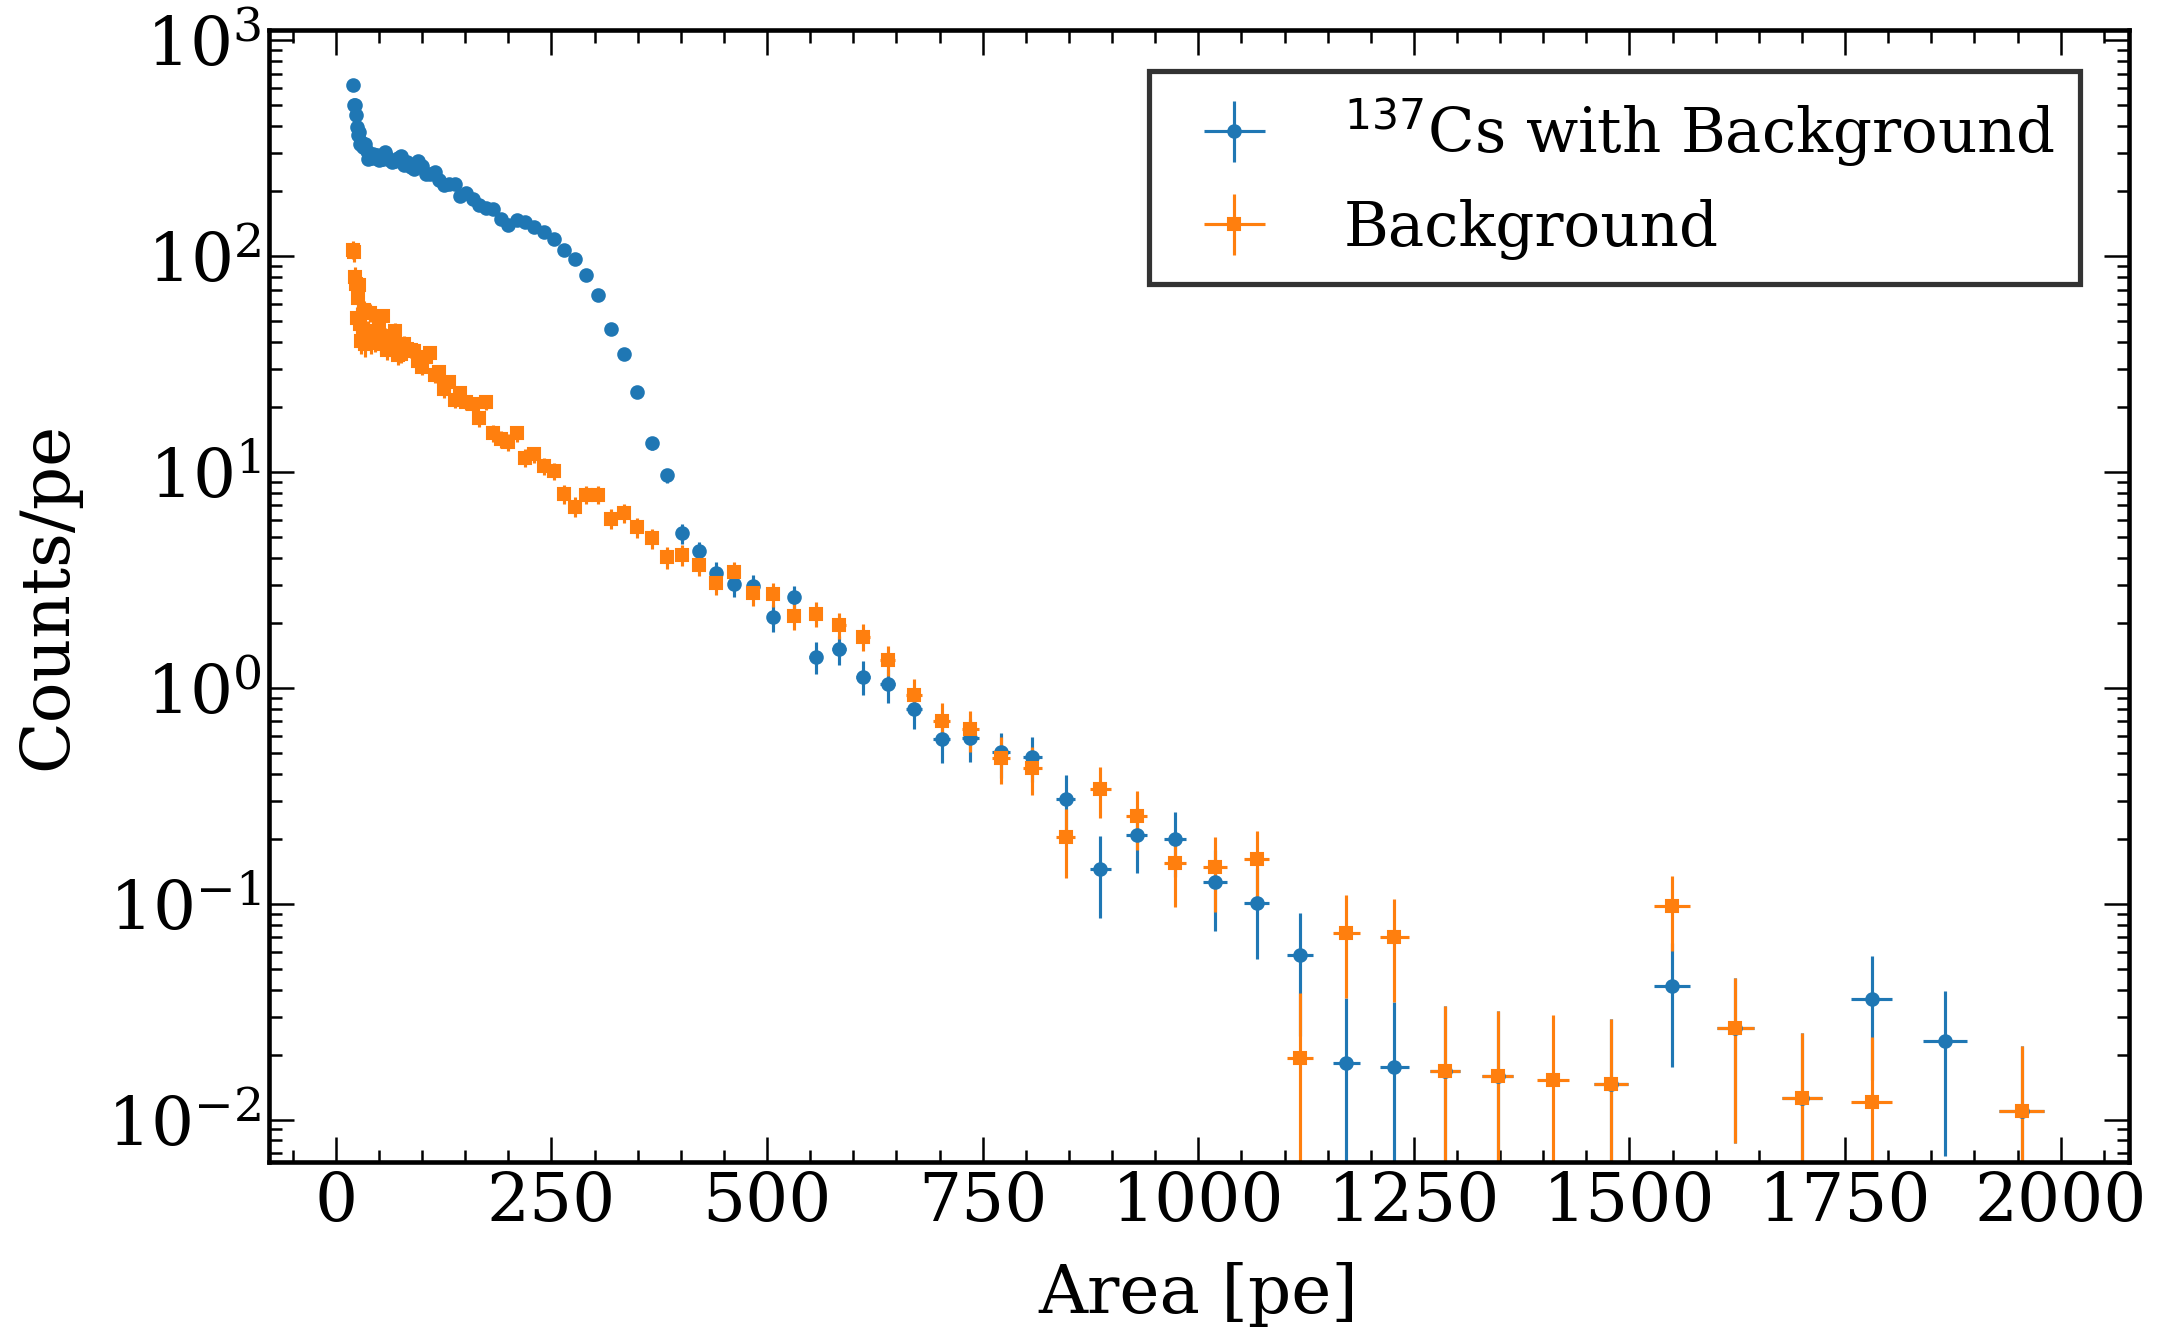

In [14]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins = 2*np.logspace(1,3,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])

n_cs, _ = np.histogram(p_cs_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_cs/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_cs)/bin_fullwidths, capsize=0, linestyle='', label='$^{137}$Cs with Background', fmt='o')

n_bk, _ = np.histogram(p_bk_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_bk/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_bk)/bin_fullwidths, capsize=0, linestyle='', label='Background', fmt='s')

plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_lin_log.png", bbox_inches='tight')
plt.show()

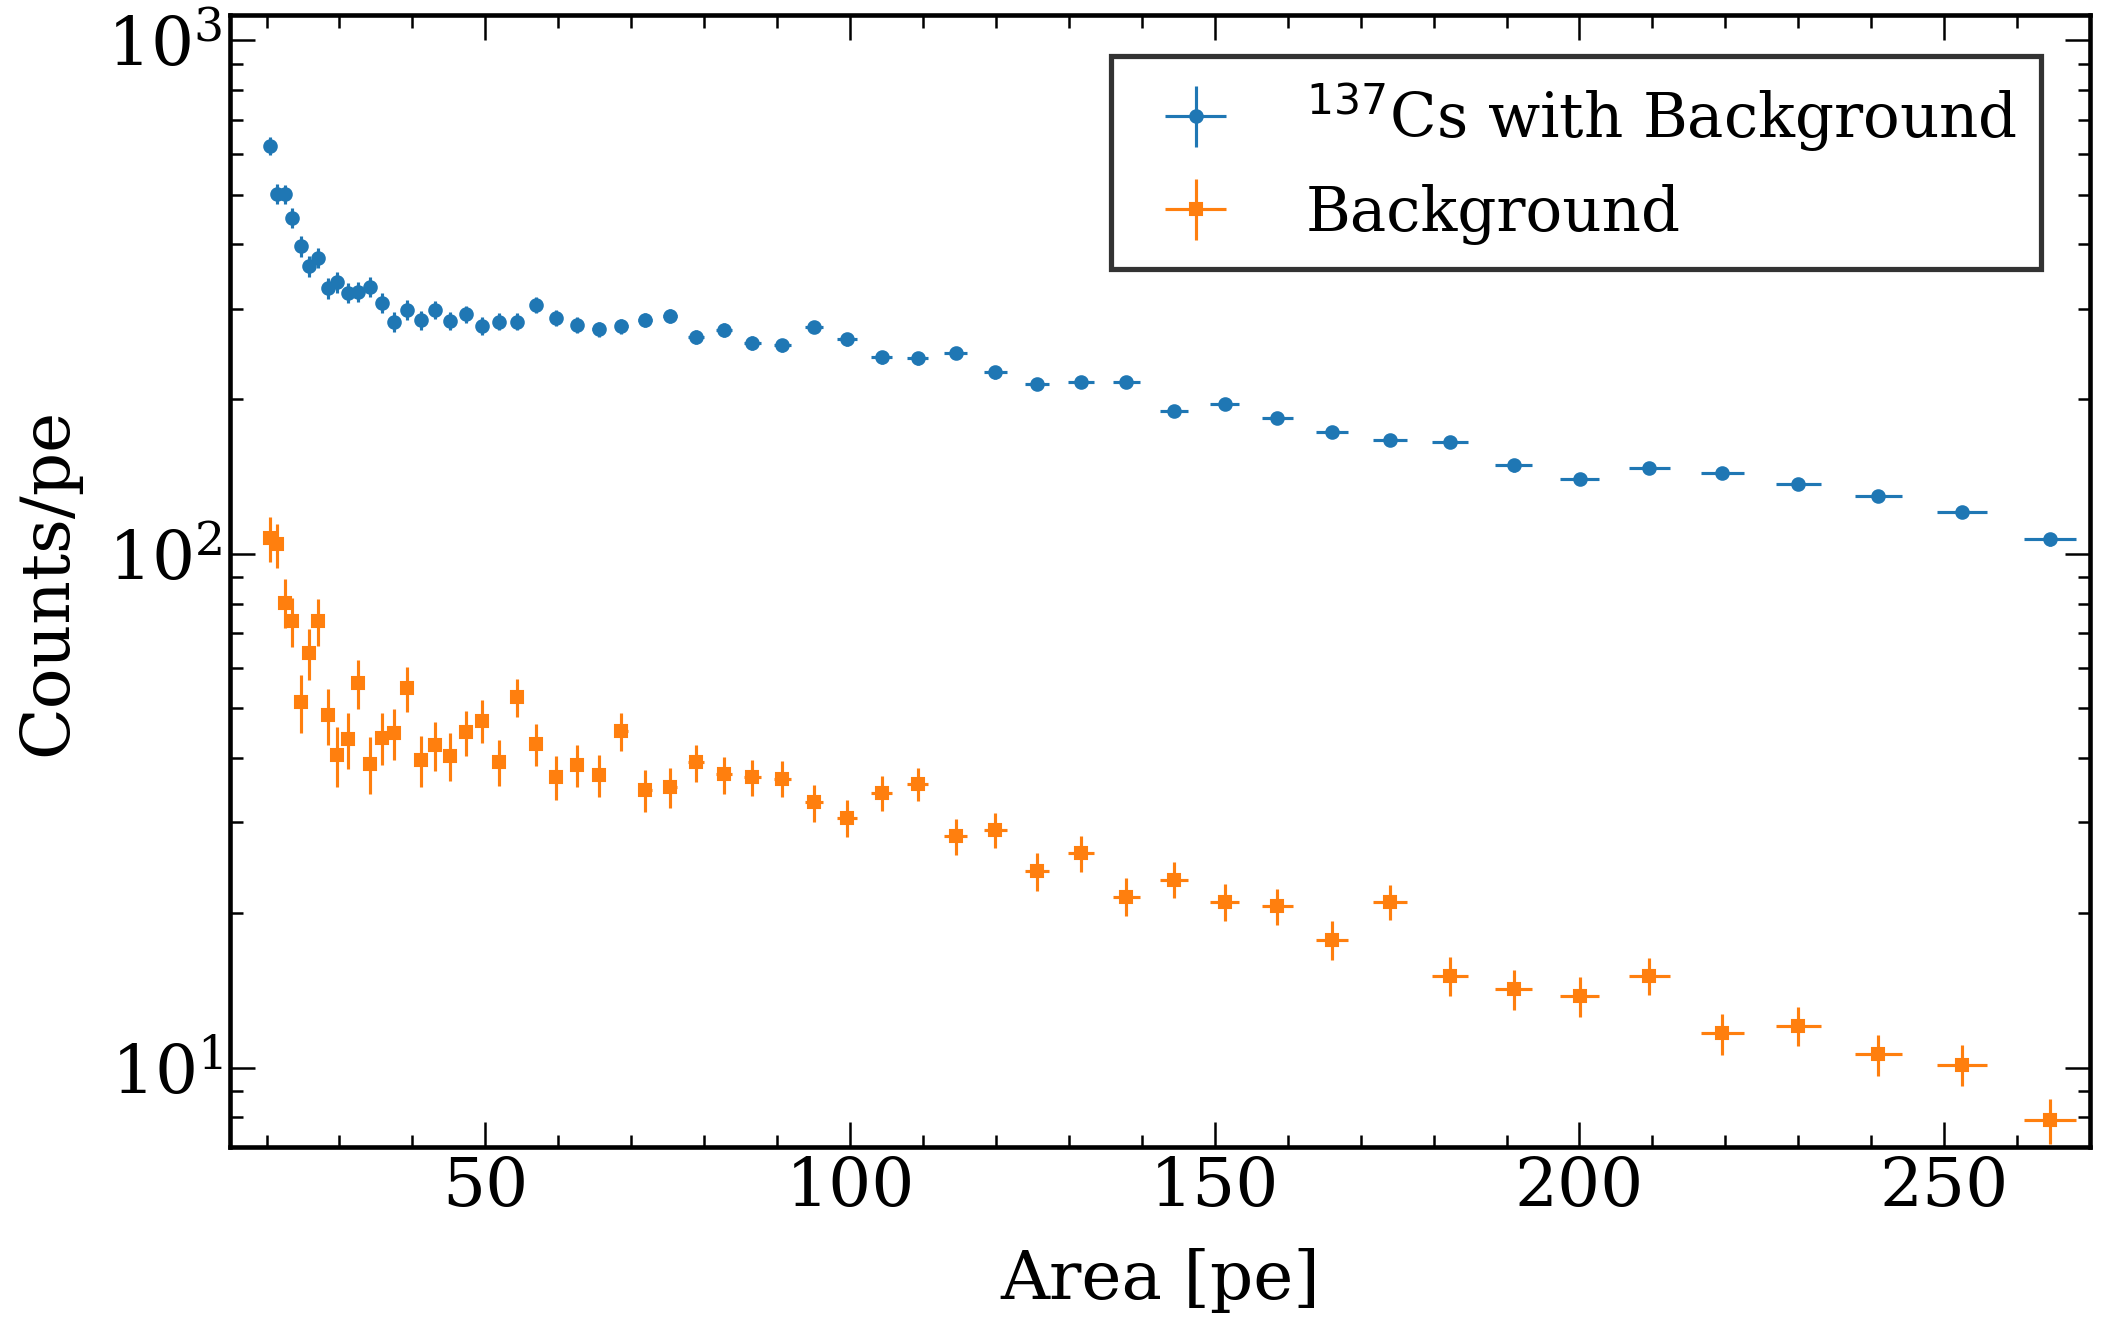

In [15]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins = 2*np.logspace(1,3,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])

n_cs, _ = np.histogram(p_cs_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_cs/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_cs)/bin_fullwidths, capsize=0, linestyle='', label='$^{137}$Cs with Background', fmt='o')

n_bk, _ = np.histogram(p_bk_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_bk/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_bk)/bin_fullwidths, capsize=0, linestyle='', label='Background', fmt='s')

plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)
plt.xlim(15, 270)
plt.ylim(bottom = 7)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_lin_log_zoom.png", bbox_inches='tight')
plt.show()

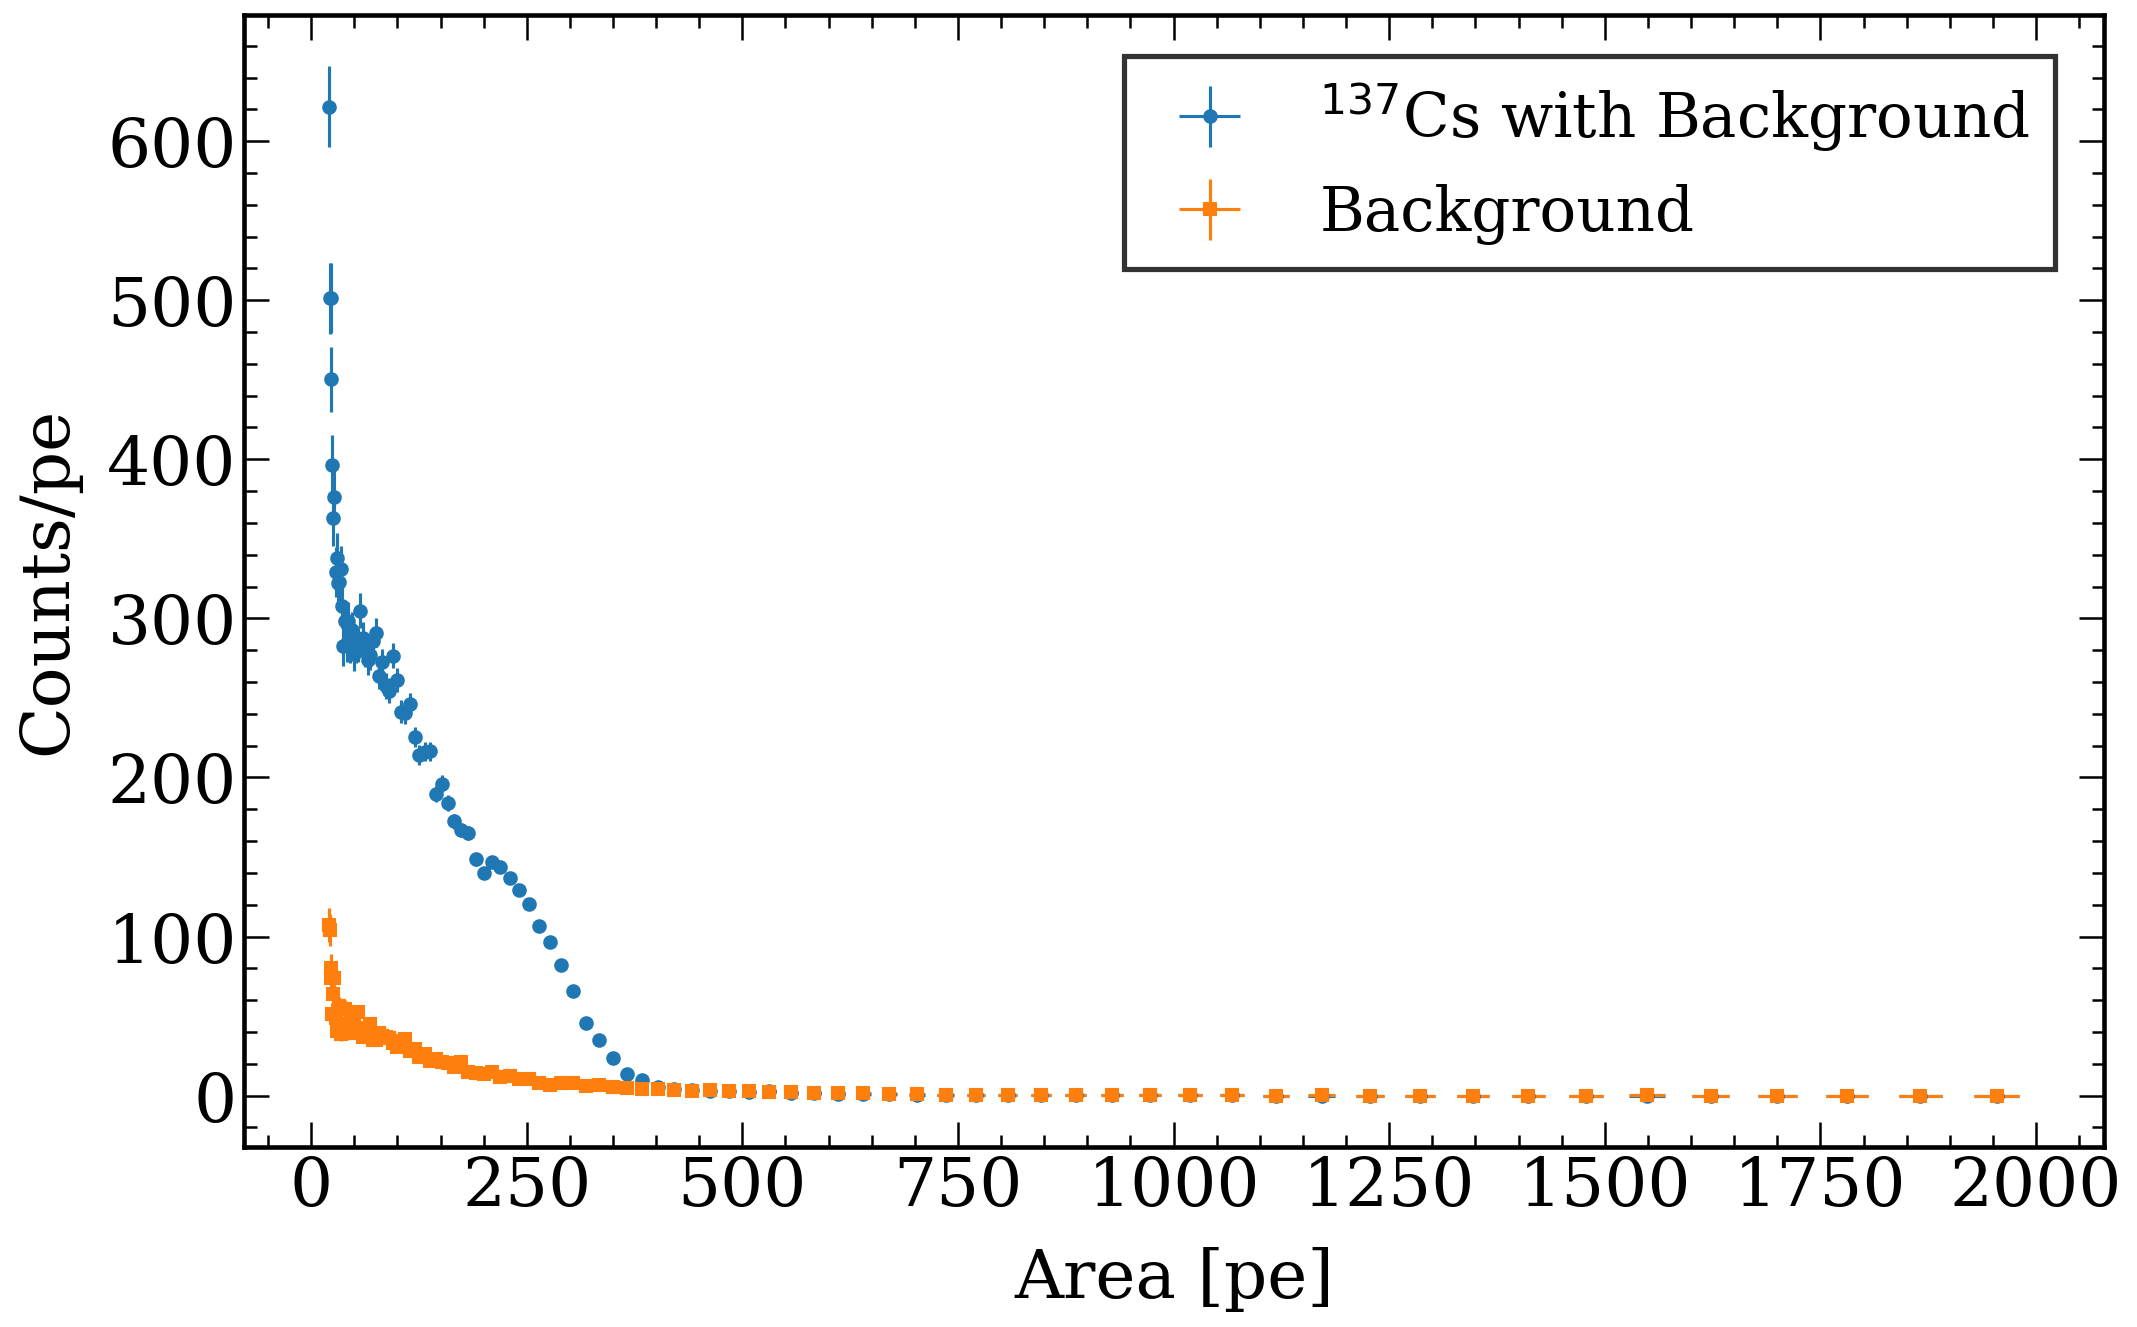

In [16]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins = 2*np.logspace(1,3,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])

n_cs, _ = np.histogram(p_cs_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_cs/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_cs)/bin_fullwidths, capsize=0, linestyle='', label='$^{137}$Cs with Background', fmt='o')

n_bk, _ = np.histogram(p_bk_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_bk/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_bk)/bin_fullwidths, capsize=0, linestyle='', label='Background', fmt='s')

#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_lin_lin.png", bbox_inches='tight')
plt.show()

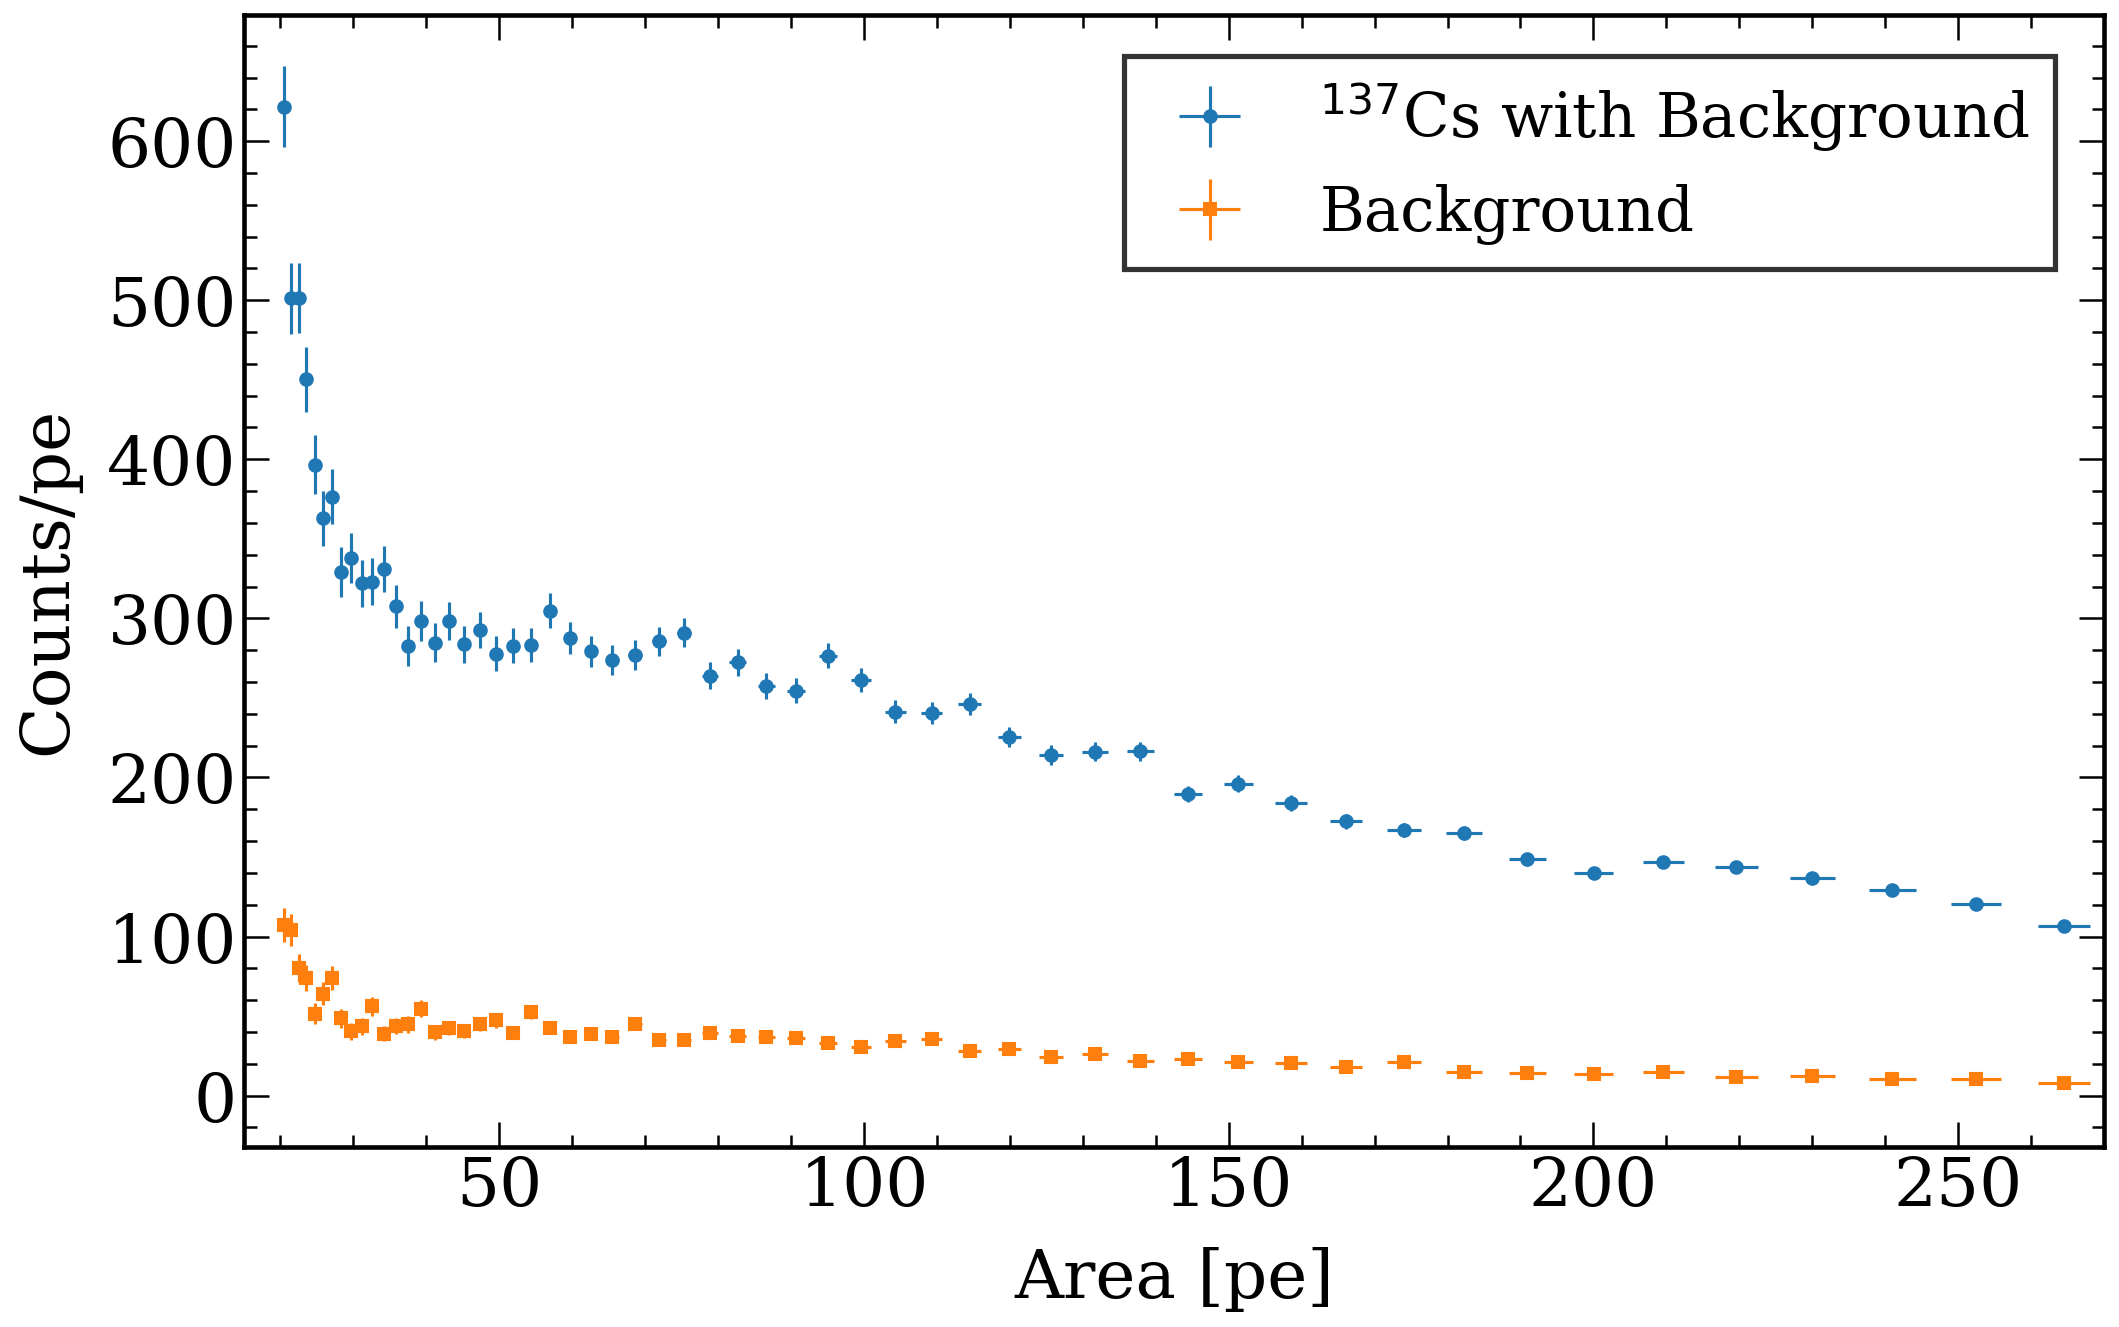

In [17]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

bins = 2*np.logspace(1,3,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])

n_cs, _ = np.histogram(p_cs_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_cs/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_cs)/bin_fullwidths, capsize=0, linestyle='', label='$^{137}$Cs with Background', fmt='o')

n_bk, _ = np.histogram(p_bk_area_top_s1, bins=bins)
plt.errorbar(bin_centers, n_bk/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt(n_bk)/bin_fullwidths, capsize=0, linestyle='', label='Background', fmt='s')

#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

plt.xlim(15, 270)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_lin_lin_zoom.png", bbox_inches='tight')
plt.show()

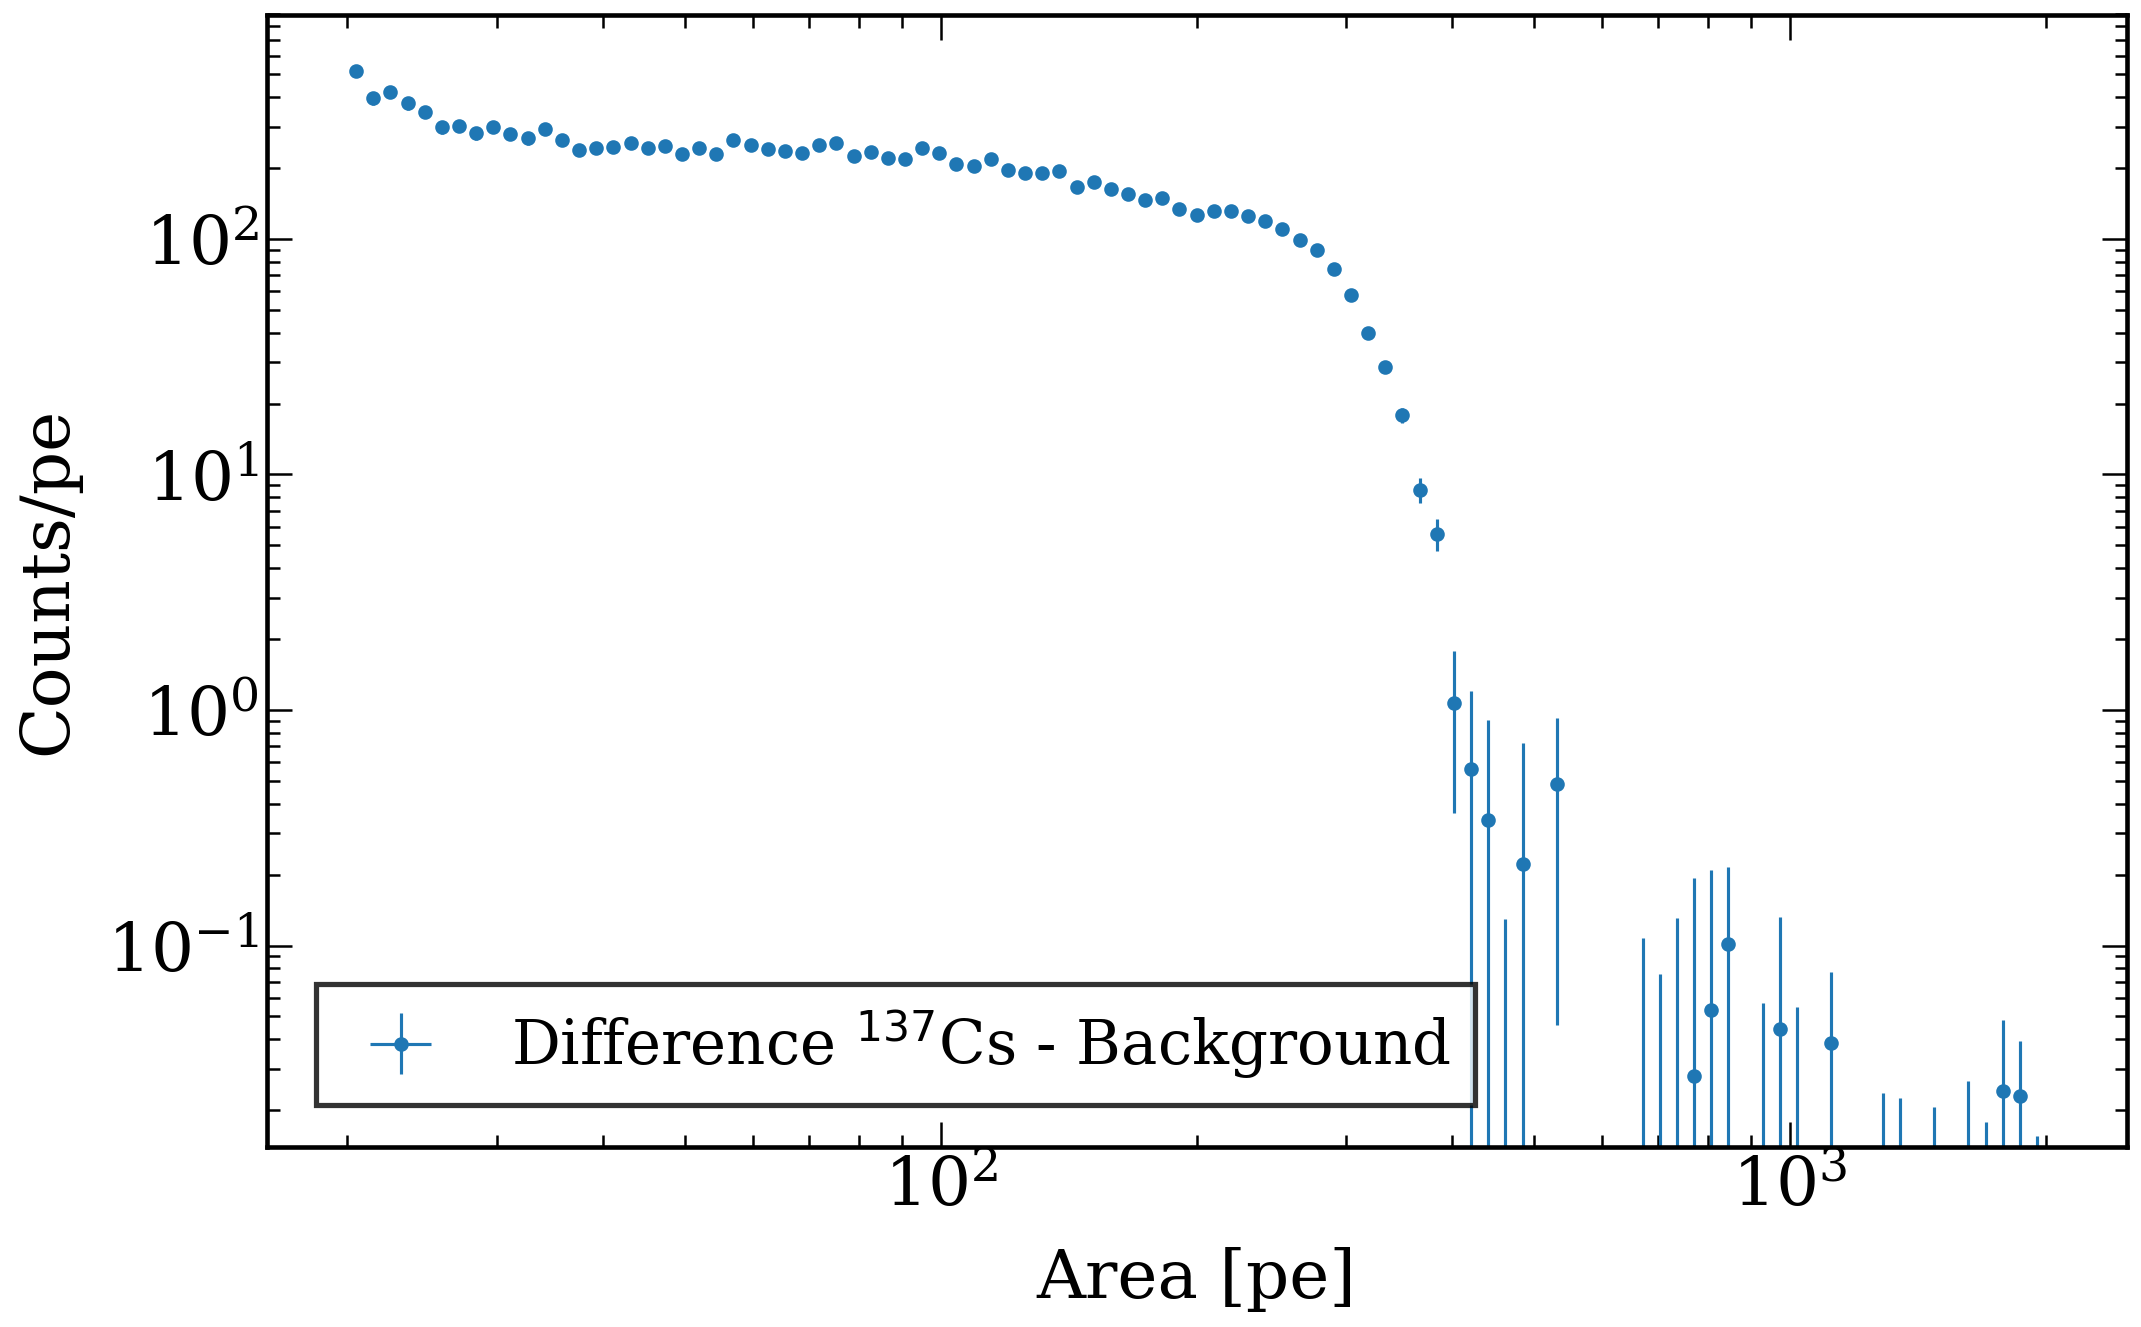

In [18]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

n_diff = n_cs-n_bk
plt.errorbar(bin_centers, (n_diff)/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt((np.sqrt(n_cs)/bin_fullwidths)**2+(np.sqrt(n_bk)/bin_fullwidths)**2), capsize=0, linestyle='', label='Difference $^{137}$Cs - Background', fmt='o')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=3, bbox_to_anchor=(0.01,0.01), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_diff_log_log.png", bbox_inches='tight')
plt.show()

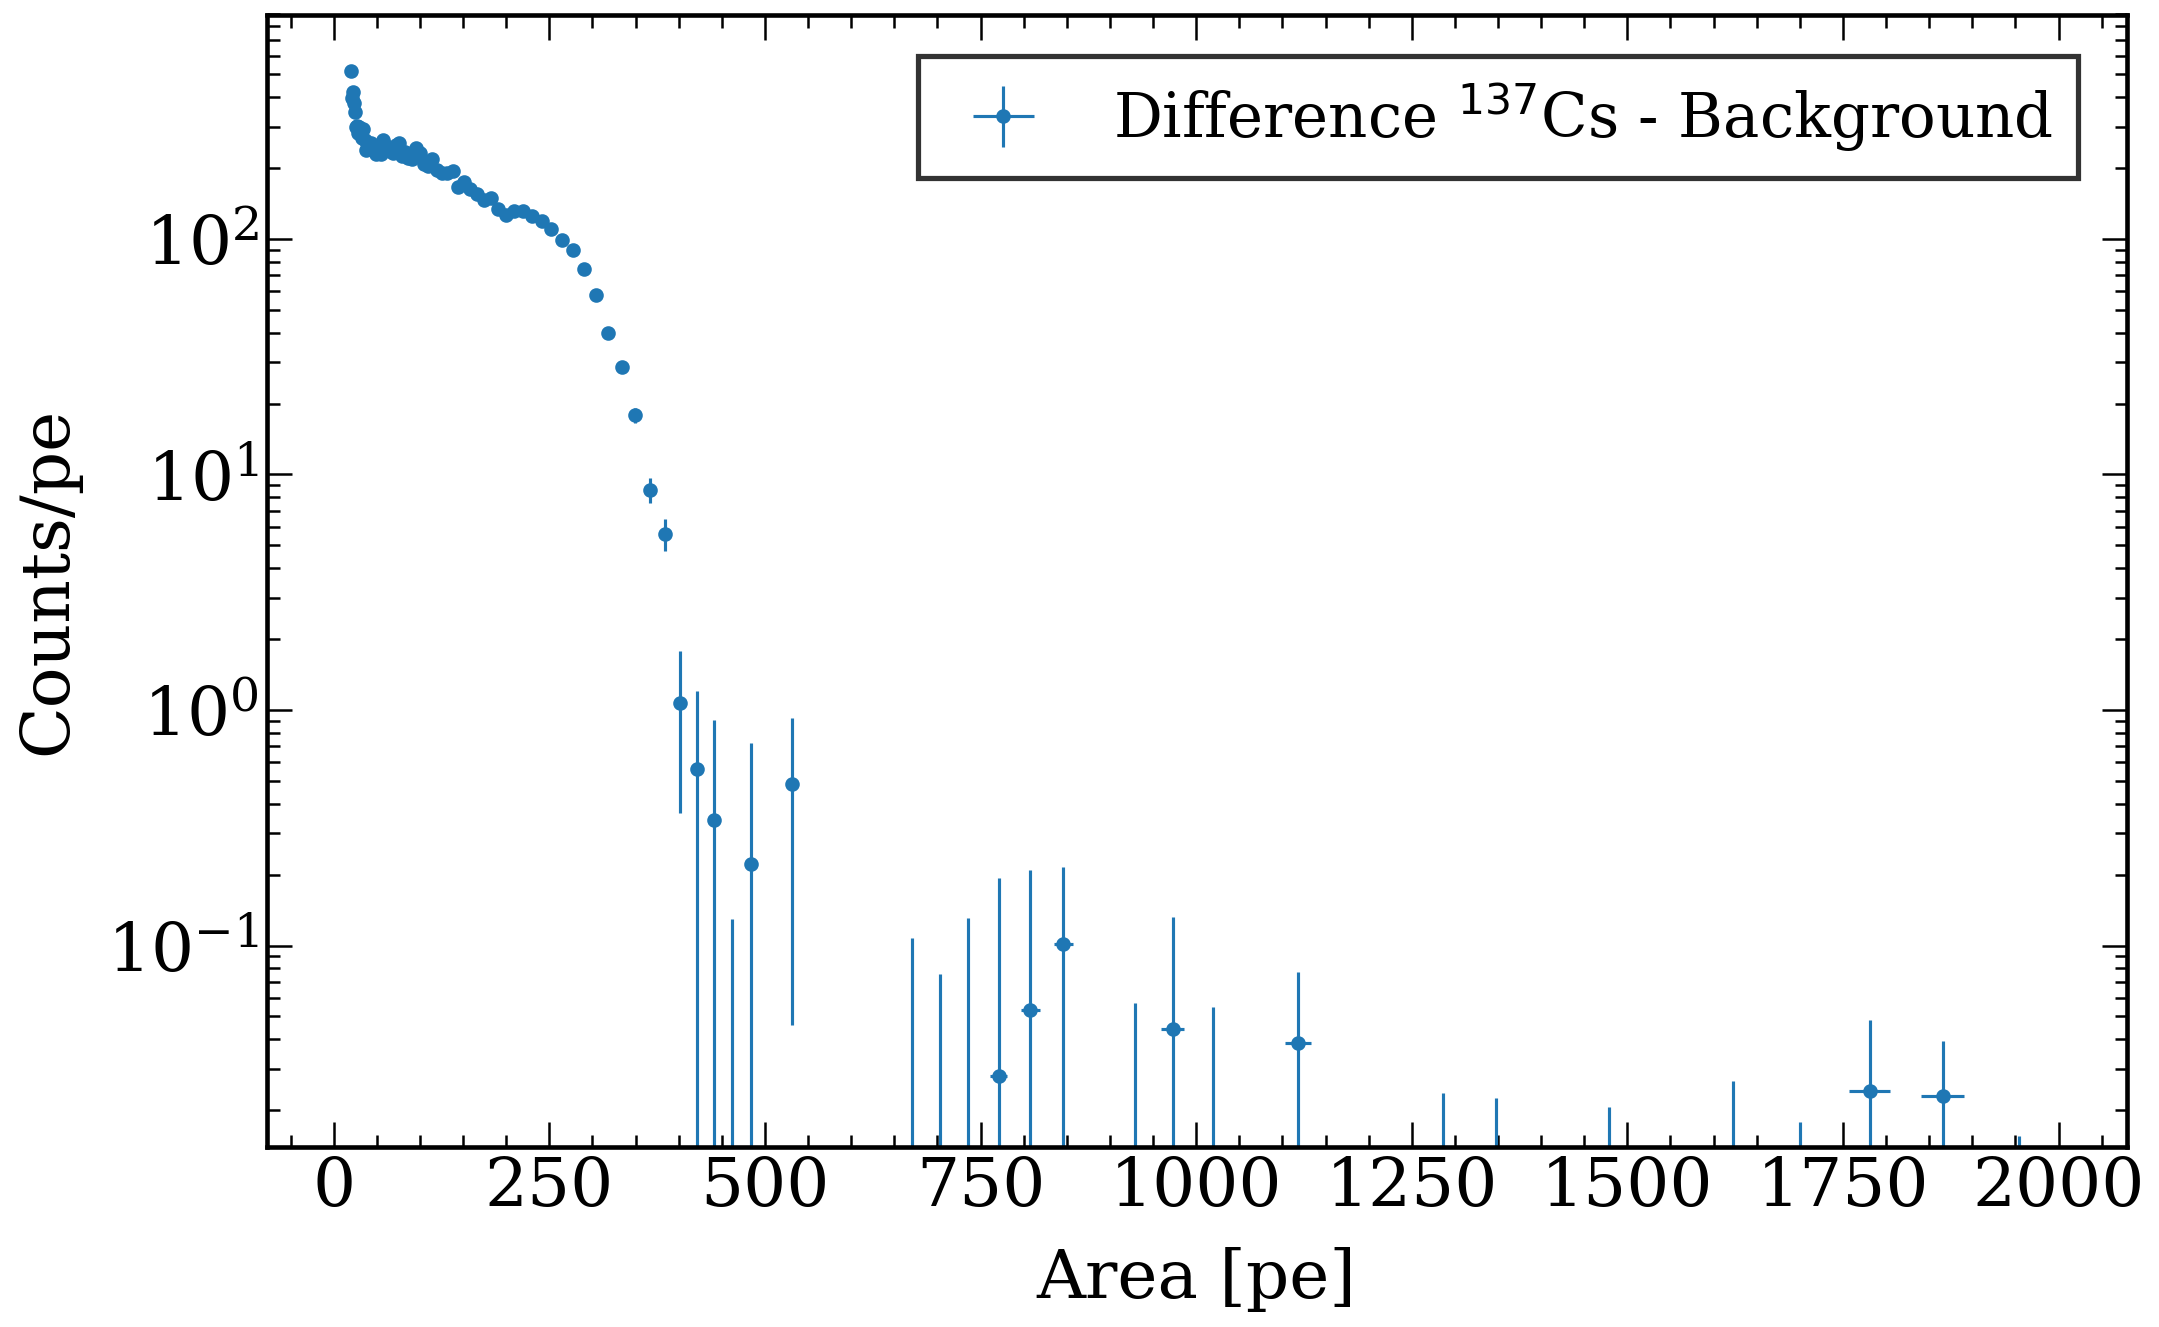

In [19]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

n_diff = n_cs-n_bk
plt.errorbar(bin_centers, (n_diff)/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt((np.sqrt(n_cs)/bin_fullwidths)**2+(np.sqrt(n_bk)/bin_fullwidths)**2), capsize=0, linestyle='', label='Difference $^{137}$Cs - Background', fmt='o')

plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

#plt.xlim(20, 2e3)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_diff_lin_log.png", bbox_inches='tight')
plt.show()

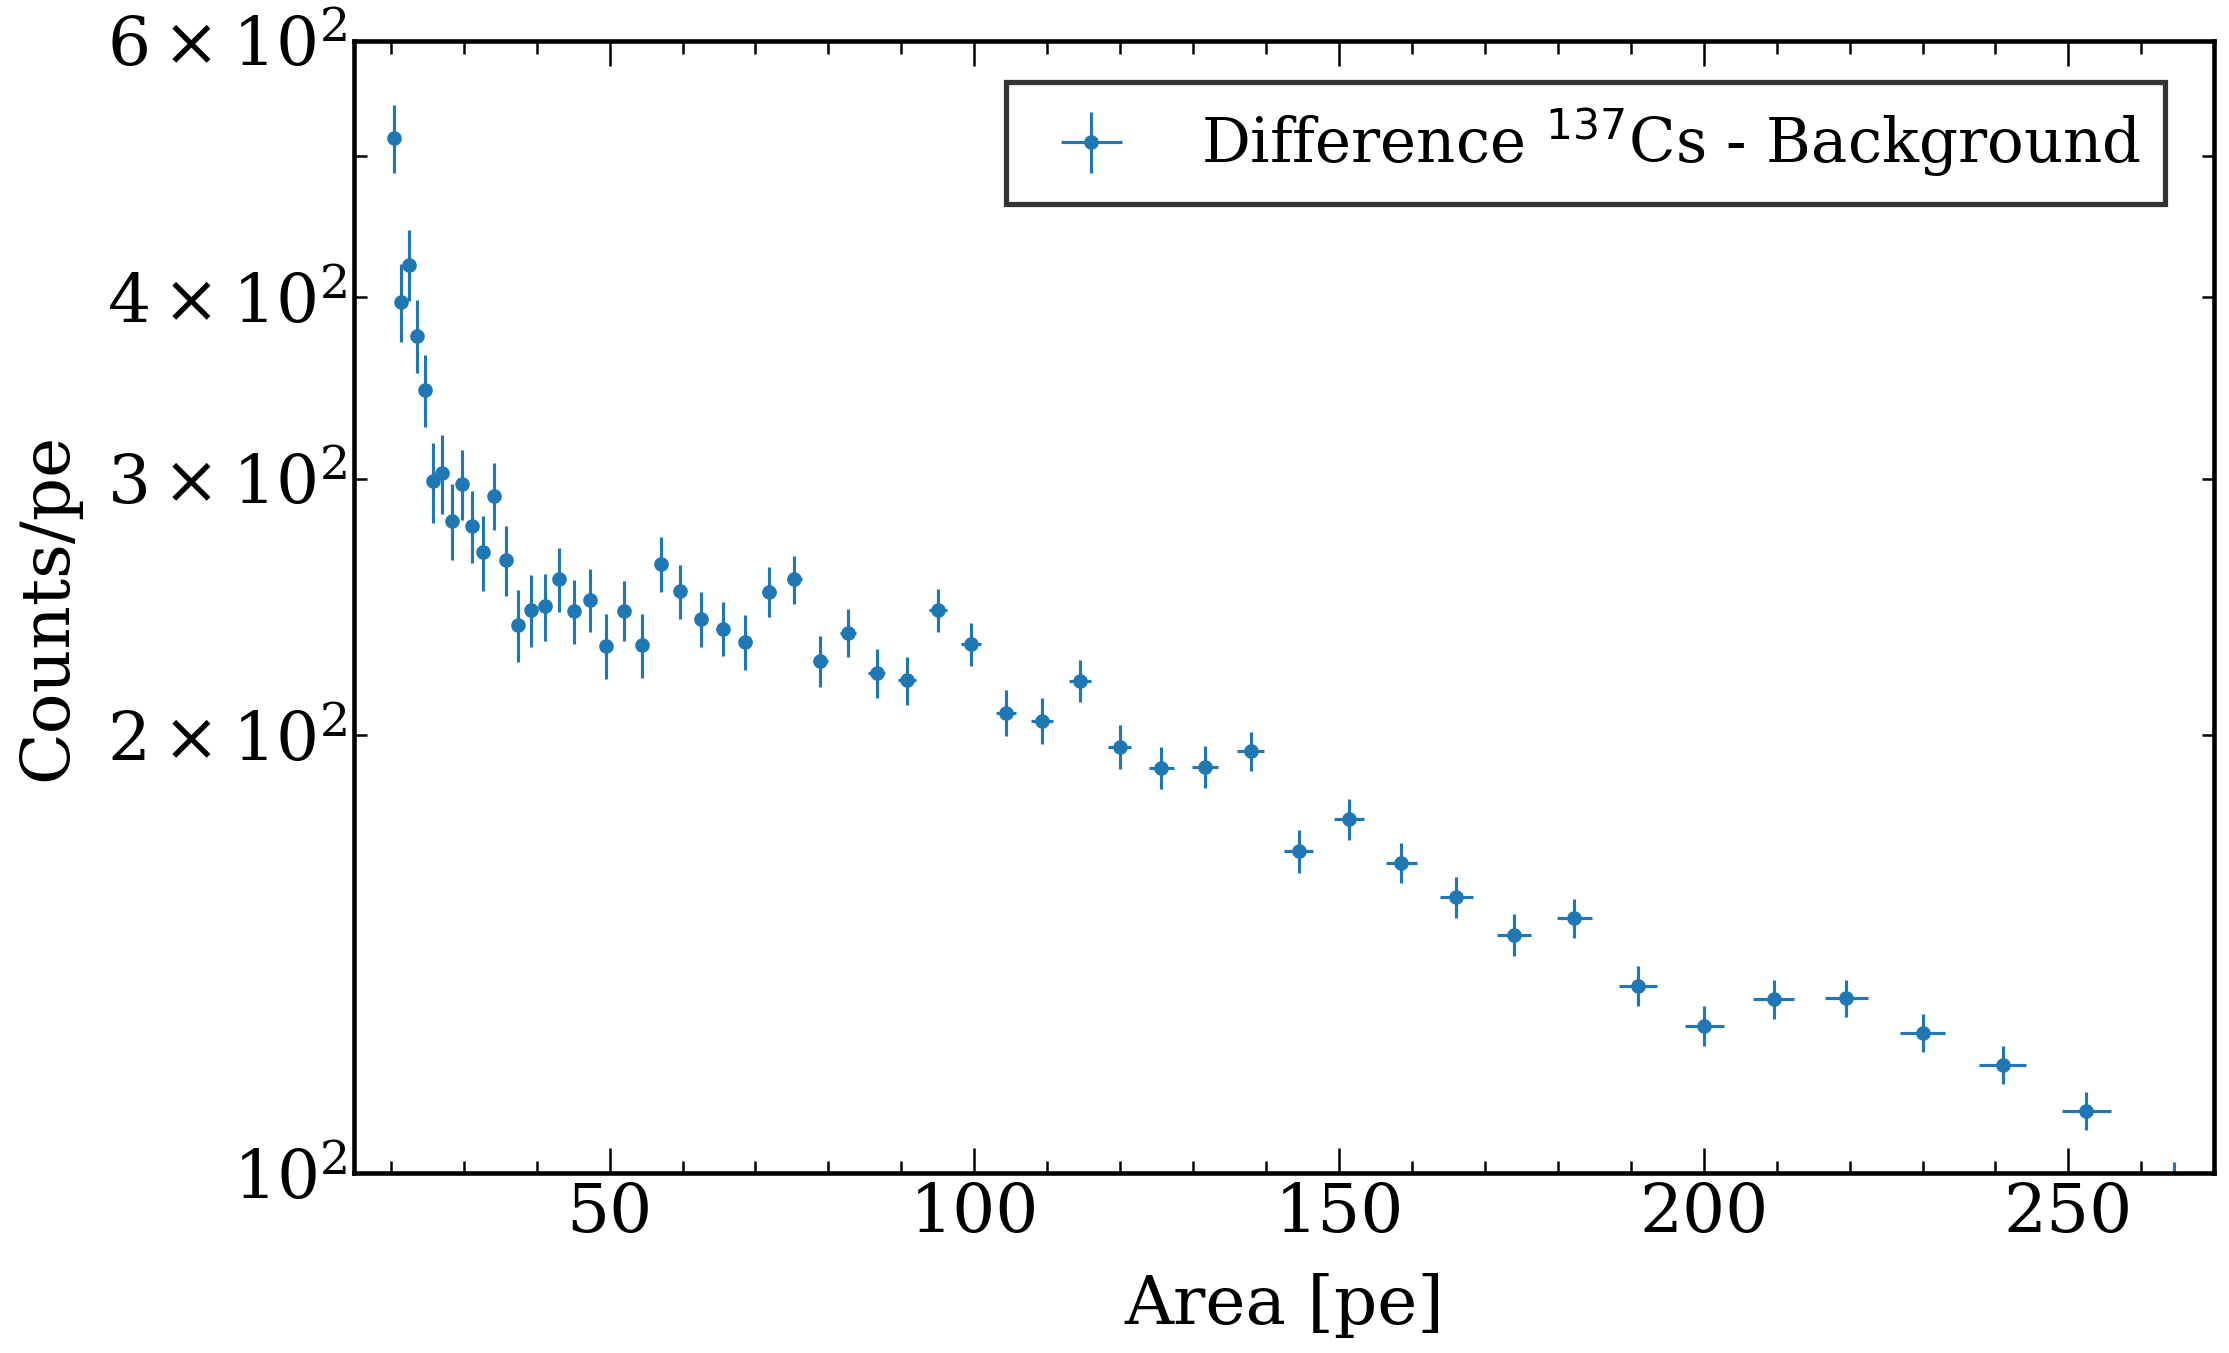

In [20]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

n_diff = n_cs-n_bk
plt.errorbar(bin_centers, (n_diff)/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt((np.sqrt(n_cs)/bin_fullwidths)**2+(np.sqrt(n_bk)/bin_fullwidths)**2), capsize=0, linestyle='', label='Difference $^{137}$Cs - Background', fmt='o')

plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

plt.xlim(15, 270)
plt.ylim(100, 600)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_diff_lin_log_zoom.png", bbox_inches='tight')
plt.show()

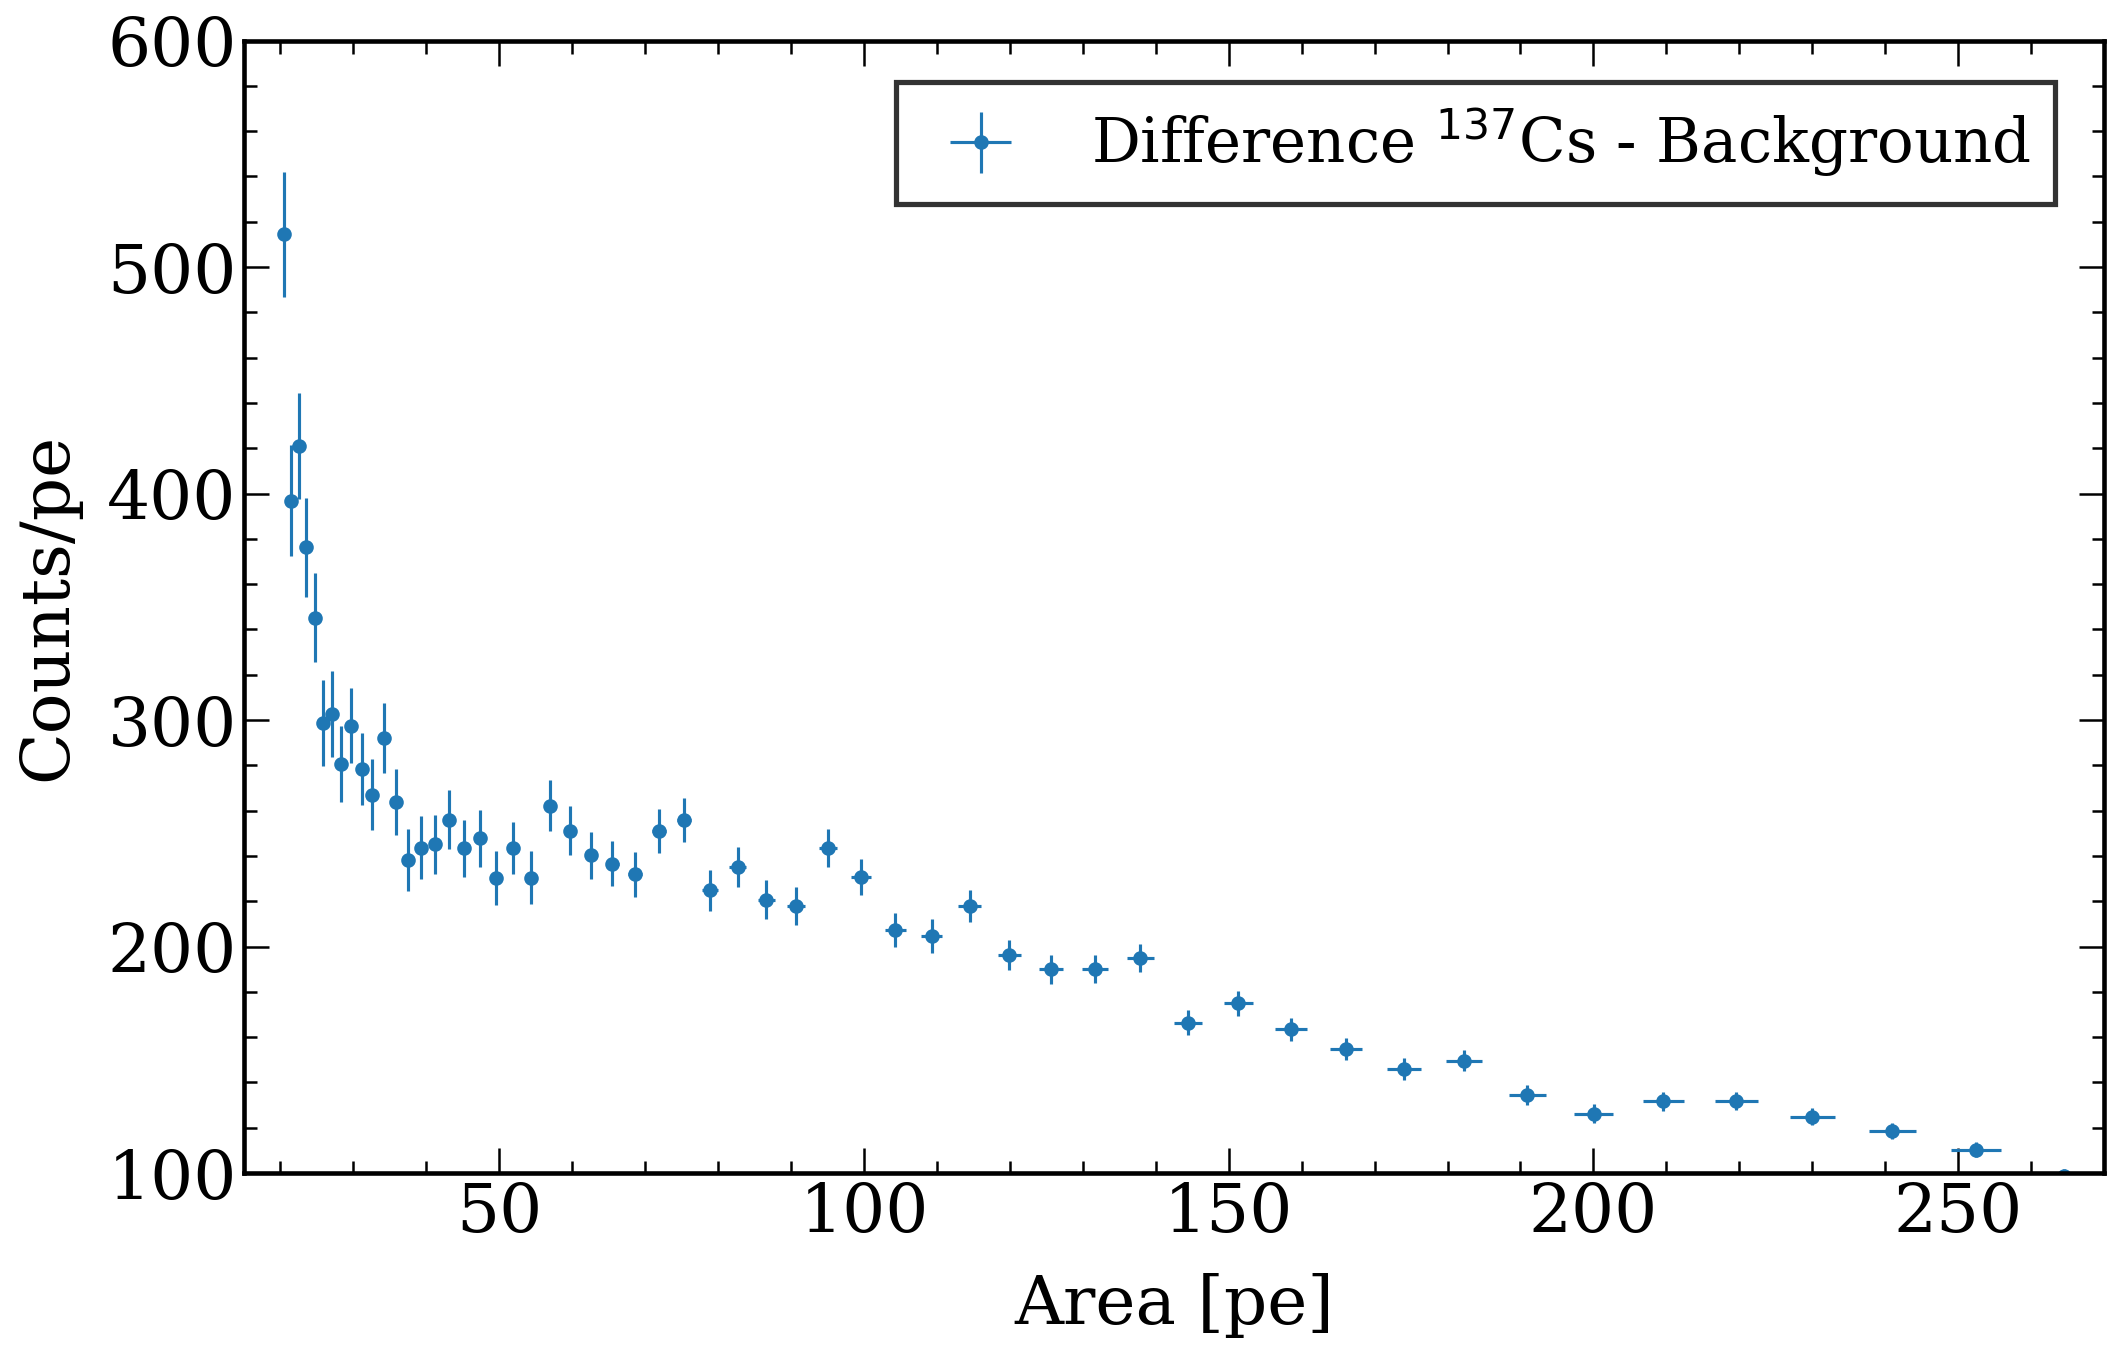

In [21]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

n_diff = n_cs-n_bk
plt.errorbar(bin_centers, (n_diff)/bin_fullwidths, xerr=bin_fullwidths/np.sqrt(12), yerr=np.sqrt((np.sqrt(n_cs)/bin_fullwidths)**2+(np.sqrt(n_bk)/bin_fullwidths)**2), capsize=0, linestyle='', label='Difference $^{137}$Cs - Background', fmt='o')

#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Counts/pe', fontsize = label_size, labelpad = label_pad)
plt.xlabel('Area [pe]', fontsize = label_size, labelpad = label_pad)

plt.xlim(15, 270)
plt.ylim(100, 600)

plt.gca().set_aspect('auto', adjustable='box')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_areaTop_hist_diff_lin_lin_zoom.png", bbox_inches='tight')
plt.show()